## Credit Card Fraud Detection
Submitted By: Vikram Mathur

* The objective is to build a model to predict fraudulent credit card transactions for proactive monitoring & detection. 
* To help banking institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions. 
* Provided with a Kaggle dataset having 2 days data with 2,84,807 transactions, out of which 492 are fraudulen

In [313]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

from imblearn.over_sampling import RandomOverSampler
from imblearn import over_sampling

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis
import math

import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [443]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [444]:
df_orig = df.copy()

* The data set has also been modified with Principal Component Analysis (PCA). 
* All variables apart from Time and Amount seem to be Gaussian.
* Class is the Target Variable.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

* All numerical variables and there are no null values

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Distribution of Classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [6]:
print("Normal Share: ", np.round(normal_share,2), "%", "\nFraud Share: ", np.round(fraud_share,2), "%")

Normal Share:  99.83 % 
Fraud Share:  0.17 %


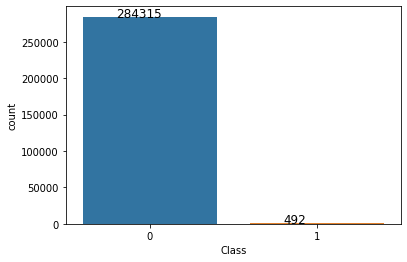

In [7]:
# bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
ax = sns.countplot(x='Class',data=df)
for i in ax.patches:
    ax.text(i.get_x()+0.20, i.get_y() + i.get_height(), str(int(i.get_height())), fontsize=12, color='black')

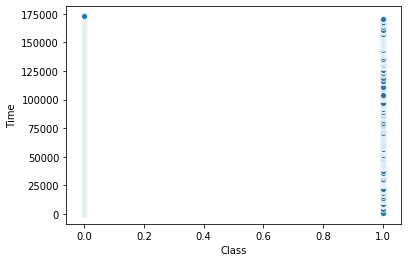

In [8]:
# scatter plot to observe the distribution of classes with time
sns.scatterplot(x='Class',y='Time',data=df)

* The time elapsed for a fraud activity seems to be at the end of the dataset. However, this Time variable does not seem of signiificance as there does not seem to be a connect between fraud and time elapsed.

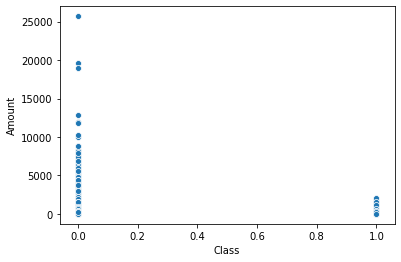

In [9]:
# scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x='Class',y='Amount',data=df)

* The fraudulent cases have amounts under 3500. The fraud transactions are not very high amounts to attract immediate attention.

In [10]:
# Drop unnecessary columns
df.drop('Time', axis=1, inplace=True)

### Splitting the data into train & test data

In [11]:
X = df.drop('Class', axis=1)

In [12]:
y= df['Class']

In [13]:
# The stratified split will ensure that test dataset has at least 100 records corresponding to the minority class. 

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, stratify=y, random_state=100)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(199364, 29) (199364,) (85443, 29) (85443,)


In [14]:
print(y_train.value_counts())
print(y_test.value_counts())

0    199020
1       344
Name: Class, dtype: int64
0    85295
1      148
Name: Class, dtype: int64


* The minority class has 148 rows in the test set. The split has been done based on stratas

##### Preserve X_test & y_test to evaluate on the test data once model is built

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


In [16]:
# Scaling Amount Column
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['Amount'] = scaler.fit_transform(np.array(X_train['Amount']).reshape(-1,1))

In [17]:
X_test['Amount'] = scaler.transform(np.array(X_test['Amount']).reshape(-1,1))

### Skewness

In [18]:
# plotting histograms from the dataset to see the skewness

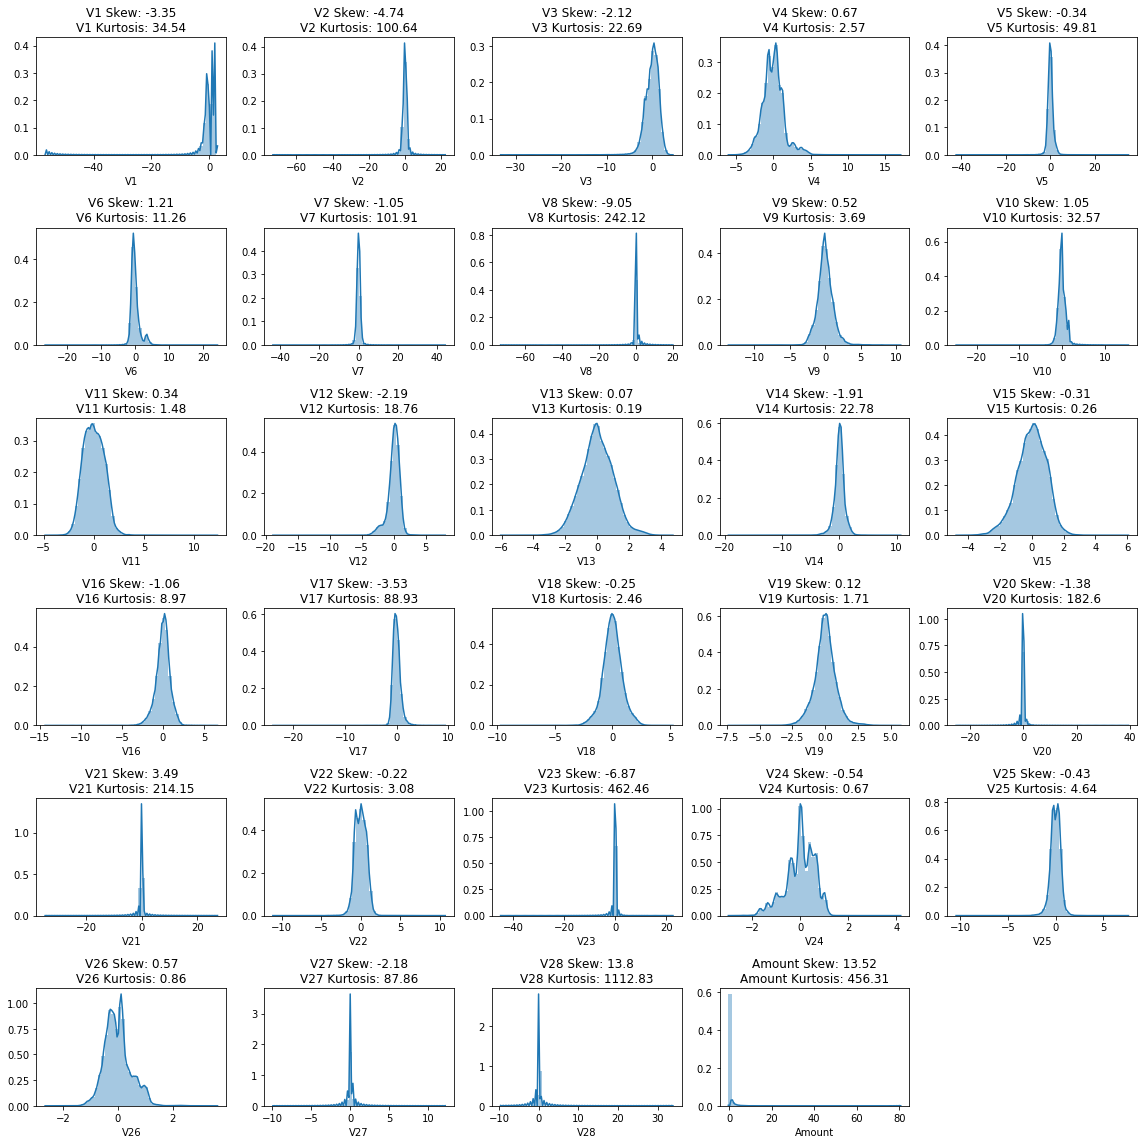

In [19]:
cols = X_train.columns
rows = math.ceil(len(cols) / 5)
plt.figure(figsize=(16,16))
for i in range(0,len(cols)):
    plt.subplot(rows, 5, i+1)
    ax = sns.distplot(X_train[cols[i]], kde=True)
    plt.title(cols[i] + " Skew: " + str(np.round(skew(X_train[cols[i]]),2)) + "\n" + cols[i] + " Kurtosis: " + str(np.round(kurtosis(X_train[cols[i]]),2)))
plt.tight_layout()
plt.show()

* Most of the variables are highly skewed.
* Applying PowerTransformer. We will use Yeo Johnson method instead of Box Cox Transformation in order to take care of negative values.

In [20]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[cols] = pt.fit_transform(X_train[cols])

In [21]:
# plot the histograms of variables from the dataset again to see the result 

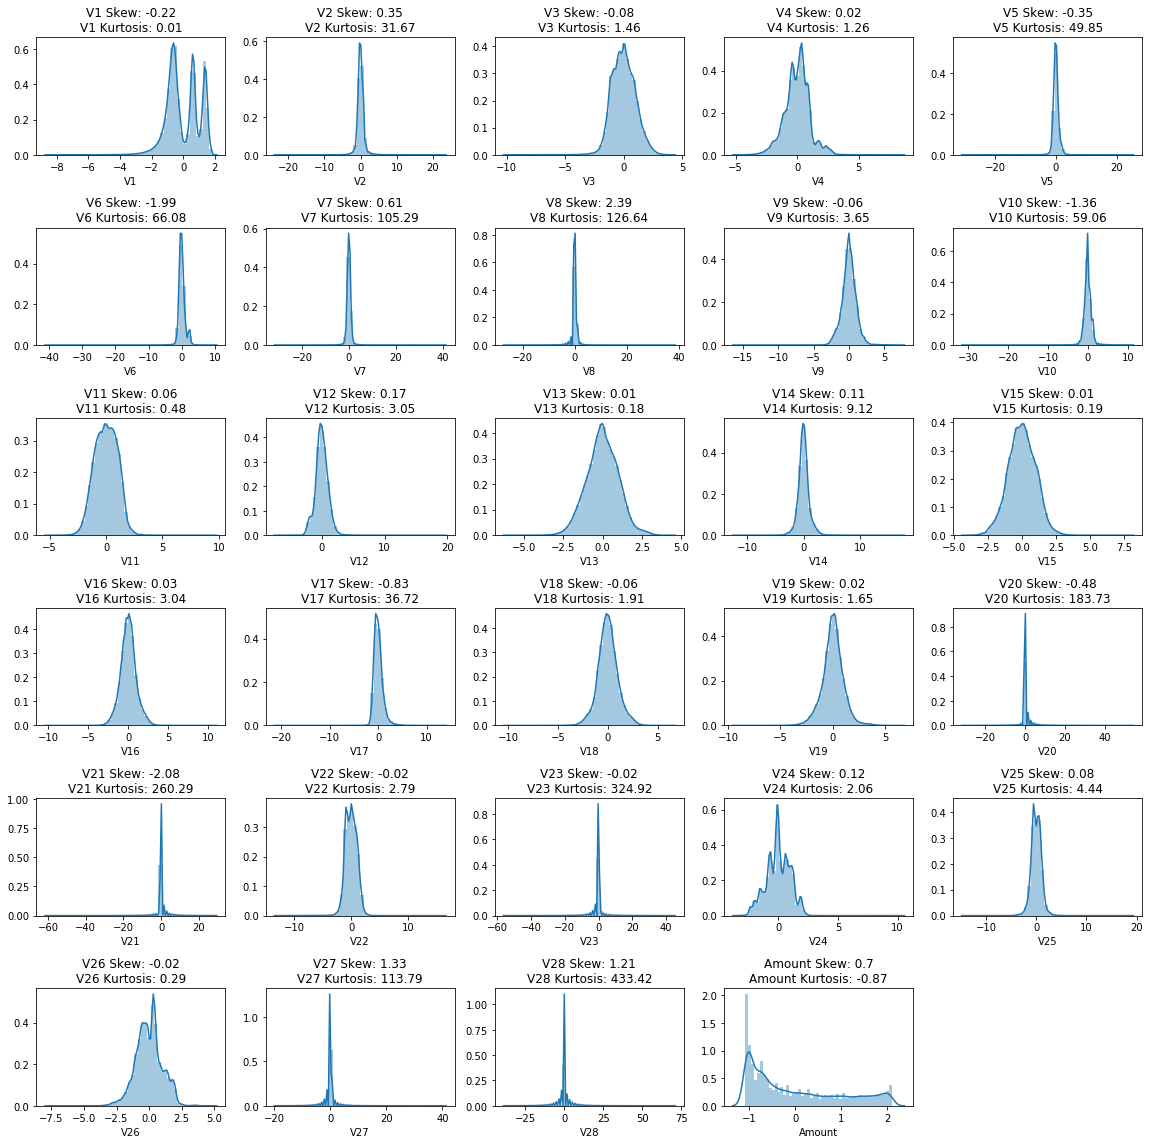

In [22]:
plt.figure(figsize=(16,16))
for i in range(0,len(cols)):
    plt.subplot(rows, 5, i+1)
    ax = sns.distplot(X_train[cols[i]], kde=True)
    plt.title(cols[i] + " Skew: " + str(np.round(skew(X_train[cols[i]]),2)) + "\n" + cols[i] + " Kurtosis: " + str(np.round(kurtosis(X_train[cols[i]]),2)))
plt.tight_layout()
plt.show()

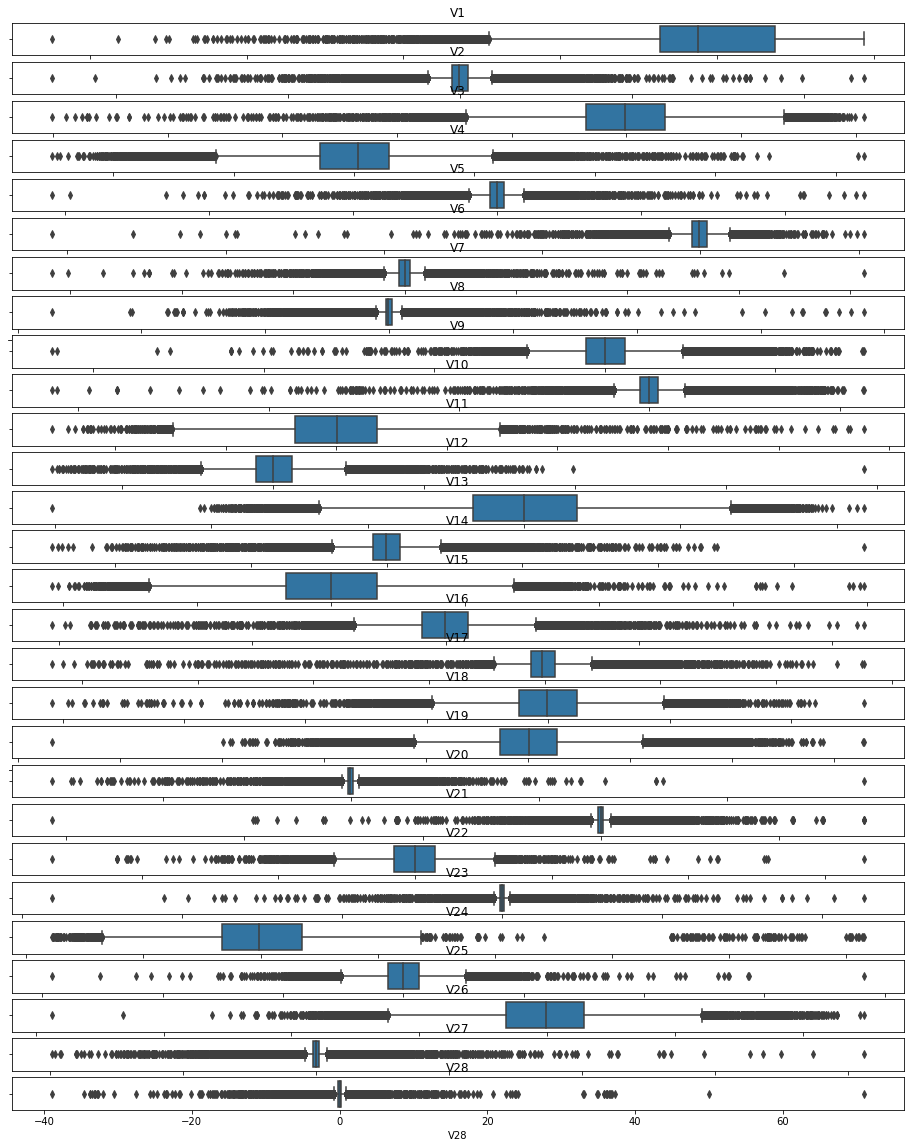

In [23]:
# generic function to plot box plots to view presence of outliers.
def check_outliers_continuous(df, cols):
    f, ax = plt.subplots(nrows=len(cols)-1, figsize=(16,20))
    for i in range(0,len(cols)-1):
        sns.boxplot(df[cols[i]].dropna(), ax=ax[i])
        ax[i].title.set_text(cols[i])
    plt.tight_layout()
    plt.show()
    
check_outliers_continuous(X_train, cols)

## Model Building

#### General Functions

Random Oversampling Dataset

In [24]:
ros = RandomOverSampler(sampling_strategy='minority')
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_train_ros = pd.DataFrame(data=X_train_ros, columns=X_train.columns)

SMOTE Oversampling Dataset

In [25]:
# smote oversampling
def smote(X_train, y_train):
    sm = over_sampling.SMOTE(random_state=0)
    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
    # Artificial minority samples and corresponding minority labels from SMOTE are appended
    # below X_train and y_train respectively
    # So to exclusively get the artificial minority samples from SMOTE, we do
    X_train_smote_1 = X_train_smote[X_train.shape[0]:]

    X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
    X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()

    plt.subplot(3, 1, 1)
    plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
    plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
                label='Artificial SMOTE Class-1 Examples')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
    plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
    plt.legend()
    return X_train_smote, y_train_smote

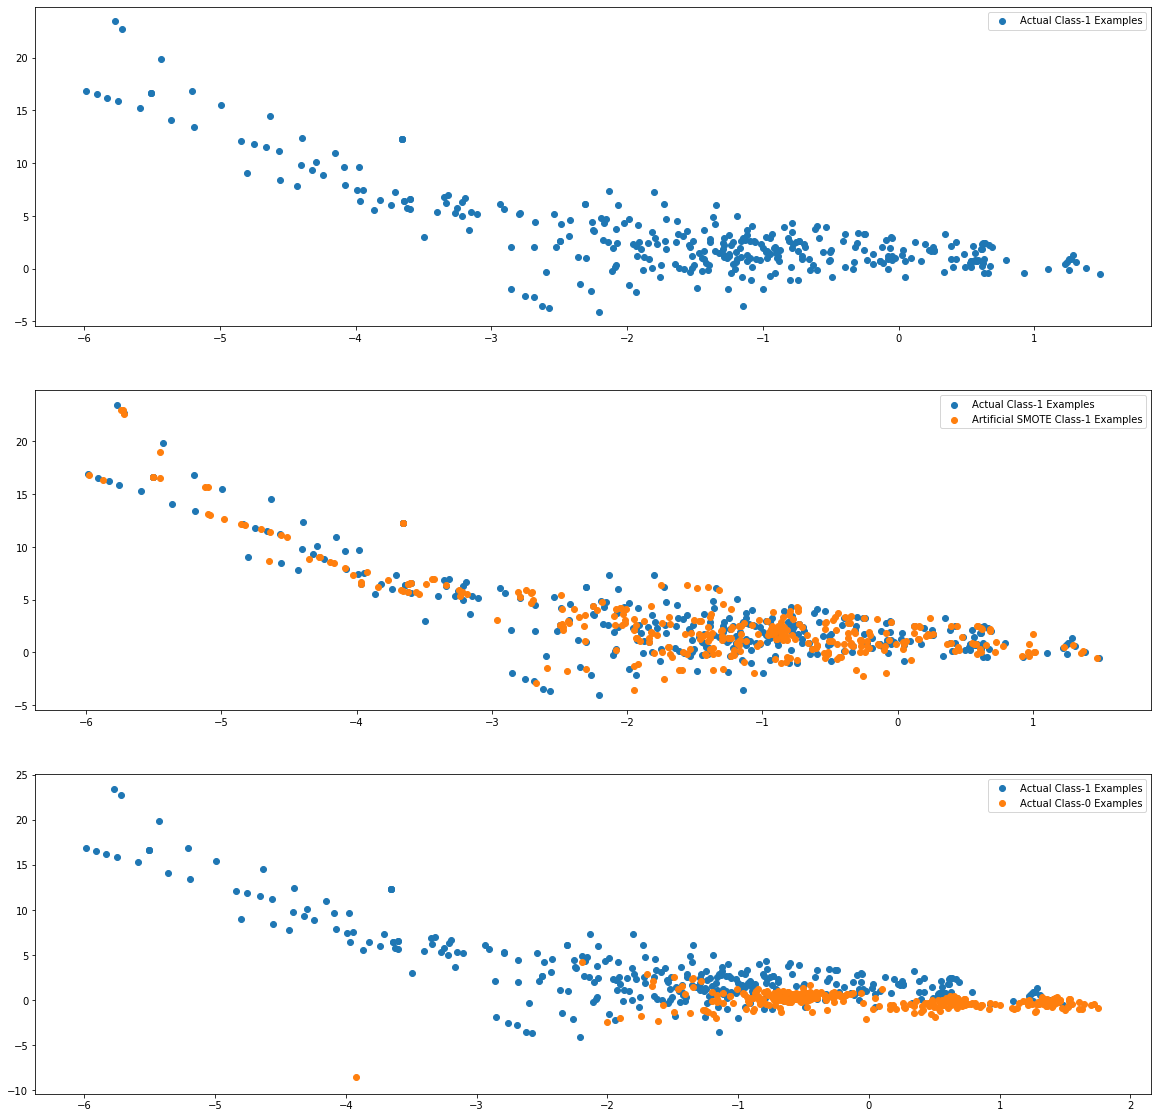

In [26]:
X_train_smote, y_train_smote = smote(X_train, y_train)
X_train_smote = pd.DataFrame(data=X_train_smote, columns=X_train.columns)

ADASYN OVERSAMPLING Dataset

In [27]:
# adasyn oversampling
def adasyn(X_train, y_train):
    ada = over_sampling.ADASYN(random_state=0)
    X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
    # Artificial minority samples and corresponding minority labels from ADASYN are appended
    # below X_train and y_train respectively
    # So to exclusively get the artificial minority samples from ADASYN, we do
    X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

    X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
    X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

    plt.rcParams['figure.figsize'] = [20, 20]
    fig = plt.figure()

    plt.subplot(3, 1, 1)
    plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
    plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
                label='Artificial ADASYN Class-1 Examples')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
    plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
    plt.legend()
    return X_train_adasyn, y_train_adasyn

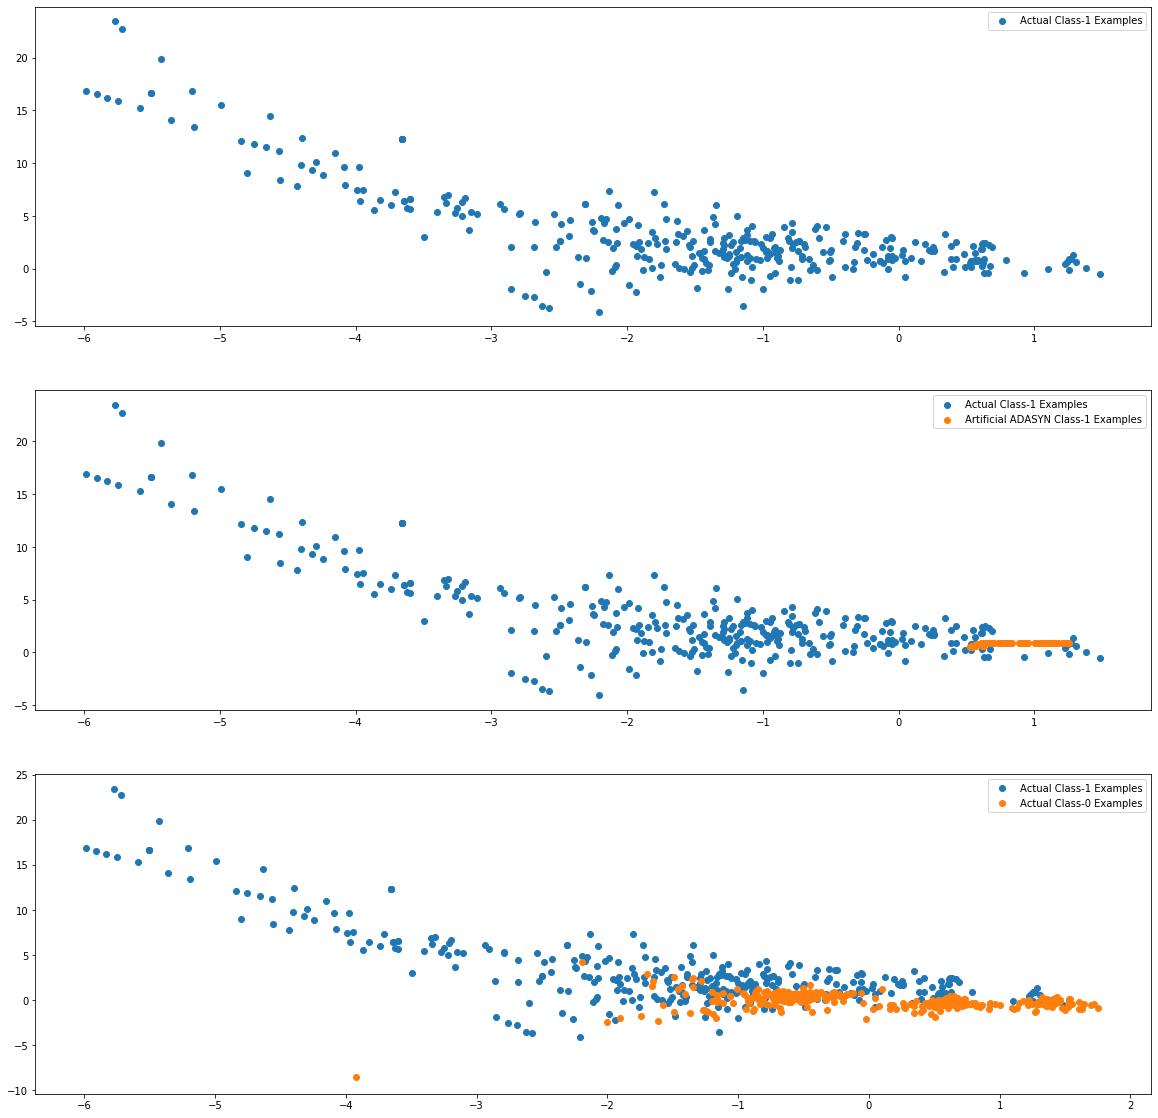

In [28]:
X_train_adasyn, y_train_adasyn = adasyn(X_train, y_train)
X_train_adasyn = pd.DataFrame(data=X_train_adasyn, columns=X_train.columns)

In [29]:
# Procedure to draw AUC graph
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [339]:
# evaluate predictions
def evaluation_metrics_test(model, threshold_train_val):
    # use predict_proba for ROC_AUC
    y_pred = model.predict_proba(X_test)[:,1]

    y_pred = y_pred > threshold_train_val
    y_pred = y_pred.astype(int)

    roc = metrics.roc_auc_score(y_test, y_pred)
    print("Test AUC: %.2f%%" % (roc * 100.0))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    draw_roc(y_test, y_pred)

    print("Accuracy on Test Dataset: ",metrics.accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred)
    print("Confusion Matrix on Test Dataset:\n",cm)

In [255]:
# evaluate predictions on train subset
def evaluation_metrics_train(model, X_train, y_train):
    # use predict_proba for ROC_AUC
    y_pred = model.predict_proba(X_train)[:,1]
    
    roc = metrics.roc_auc_score(y_train, y_pred)
    print("Train AUC: %.2f%%" % (roc * 100.0))

    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Train ROC Curve Threshold: %.3f" % threshold)
    draw_roc(y_train, y_pred)
    
    print("Computing Predictions based on threshold value of ", threshold, " and then computing below metrics\n")

    y_pred_final = y_pred > threshold
    y_pred_final = y_pred_final.astype(int)

    print("Train Accuracy: ",metrics.accuracy_score(y_train, y_pred_final))
    print("Train Classification Report: \n", classification_report(y_train, y_pred_final))
    cm=confusion_matrix(y_train, y_pred_final)
    print("Train Confusion Matrix:\n",cm)
    return threshold

### Logistic Regression

Creating logistic regression model with default parameters and without cross validation

In [36]:
logreg_dt=LogisticRegression(random_state=42)
logreg_dt.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluating default parameters model on Test Dataset to view predictions

Train AUC: 98.30%
Train ROC Curve Threshold: 0.003


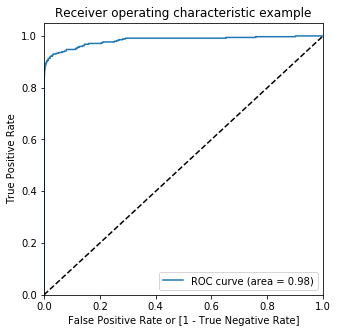

Computing Predictions based on threshold value of  0.002815698295532433  and then computing below metrics

Train Accuracy:  0.9780552155855621
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    199020
           1       0.07      0.92      0.13       344

    accuracy                           0.98    199364
   macro avg       0.53      0.95      0.56    199364
weighted avg       1.00      0.98      0.99    199364

Train Confusion Matrix:
 [[194673   4347]
 [    28    316]]


In [344]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(logreg_dt, X_train, y_train)

Test AUC: 91.44%


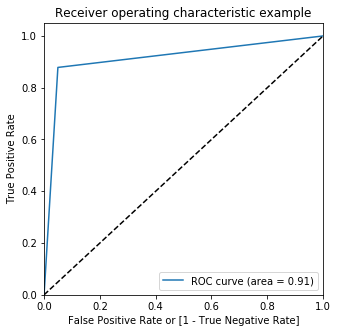

Accuracy on Test Dataset:  0.9503528668234964
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.88      0.06       148

    accuracy                           0.95     85443
   macro avg       0.51      0.91      0.52     85443
weighted avg       1.00      0.95      0.97     85443

Confusion Matrix on Test Dataset:
 [[81071  4224]
 [   18   130]]


In [345]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(logreg_dt, threshold_train_val)

#### Logistic Regression Cross Validation & Hyperparameter Tuning

In [412]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
logreg = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logreg, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(5).split(X_train, y_train), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = -1,
                           verbose = 1)

In [413]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A016388C8>,
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [414]:
# printing the optimal score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.979587123349159 using {'C': 0.1, 'penalty': 'l1'}


In [415]:
# model with the best hyperparameters
logreg = LogisticRegression(C=0.1, penalty='l1', random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 98.42%
Train ROC Curve Threshold: 0.003


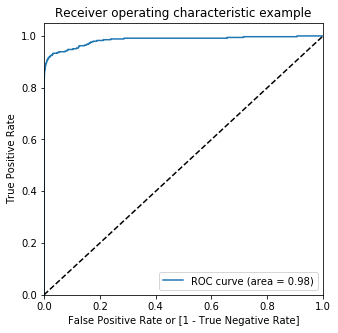

Computing Predictions based on threshold value of  0.0025351011241997673  and then computing below metrics

Train Accuracy:  0.9772025039626011
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    199020
           1       0.07      0.92      0.12       344

    accuracy                           0.98    199364
   macro avg       0.53      0.95      0.56    199364
weighted avg       1.00      0.98      0.99    199364

Train Confusion Matrix:
 [[194502   4518]
 [    27    317]]


In [416]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(logreg, X_train, y_train)

Test AUC: 91.96%


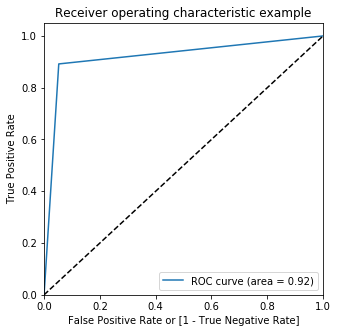

Accuracy on Test Dataset:  0.9472396802546728
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.89      0.06       148

    accuracy                           0.95     85443
   macro avg       0.51      0.92      0.51     85443
weighted avg       1.00      0.95      0.97     85443

Confusion Matrix on Test Dataset:
 [[80803  4492]
 [   16   132]]


In [417]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(logreg, threshold_train_val)

#### Handing Dataimbalance

Random Oversampling

In [43]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
logreg = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logreg, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(5).split(X_train_ros, y_train_ros), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = -1,
                           verbose = 1)

In [44]:
grid_search.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A3771C748>,
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [45]:
# printing the optimal  score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9882035379045193 using {'C': 100, 'penalty': 'l2'}


In [46]:
# model with the best hyperparameters
logreg_ros = LogisticRegression(C=100, penalty='l2', random_state=42)
logreg_ros.fit(X_train_ros, y_train_ros)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 98.82%
Train ROC Curve Threshold: 0.632


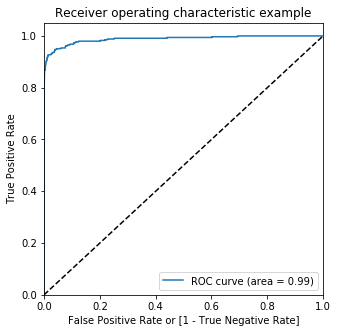

Computing Predictions based on threshold value of  0.632441395800508  and then computing below metrics

Train Accuracy:  0.9547130941613908
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    199020
           1       0.98      0.92      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.96      0.95      0.95    398040
weighted avg       0.96      0.95      0.95    398040

Train Confusion Matrix:
 [[196063   2957]
 [ 15069 183951]]


In [348]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(logreg_ros, X_train_ros, y_train_ros)

Test AUC: 92.27%


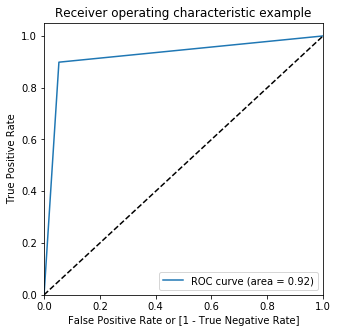

Accuracy on Test Dataset:  0.9467364207717426
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.90      0.06       148

    accuracy                           0.95     85443
   macro avg       0.51      0.92      0.51     85443
weighted avg       1.00      0.95      0.97     85443

Confusion Matrix on Test Dataset:
 [[80759  4536]
 [   15   133]]


In [349]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(logreg_ros, threshold_train_val)

AUC of Random Oversampled training data is 92%. Increased value in comparison to the imbalanced training dataset

SMOTE

In [48]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
logreg = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logreg, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(5).split(X_train_smote, y_train_smote), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = -1,
                           verbose = 1)

In [49]:
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A3BB40C48>,
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [50]:
# printing the optimal  score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9897379943604883 using {'C': 100, 'penalty': 'l2'}


In [51]:
# model with the best hyperparameters
logreg_smote = LogisticRegression(C=100, penalty='l2', random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 98.97%
Train ROC Curve Threshold: 0.528


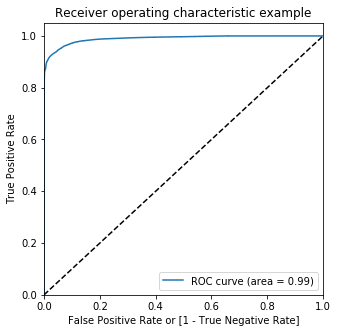

Computing Predictions based on threshold value of  0.528225235835799  and then computing below metrics

Train Accuracy:  0.949801527484675
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    199020
           1       0.97      0.92      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040

Train Confusion Matrix:
 [[194168   4852]
 [ 15129 183891]]


In [350]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(logreg_smote, X_train_smote, y_train_smote)

Test AUC: 92.06%


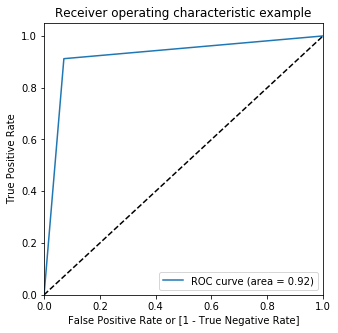

Accuracy on Test Dataset:  0.9289935980712287
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85295
           1       0.02      0.91      0.04       148

    accuracy                           0.93     85443
   macro avg       0.51      0.92      0.50     85443
weighted avg       1.00      0.93      0.96     85443

Confusion Matrix on Test Dataset:
 [[79241  6054]
 [   13   135]]


In [351]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(logreg_smote, threshold_train_val)

ADASYN

In [53]:
# Create the parameter grid based
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
# Create a based model
logreg = LogisticRegression(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logreg, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(5).split(X_train_adasyn, y_train_adasyn), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = -1,
                           verbose = 1)

In [54]:
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A3BB40148>,
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [55]:
# printing the optimal  score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9385973472541531 using {'C': 0.01, 'penalty': 'l2'}


In [56]:
# model with the best hyperparameters
logreg_adasyn = LogisticRegression(C=0.01, penalty='l2', random_state=42)
logreg_adasyn.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 96.48%
Train ROC Curve Threshold: 0.407


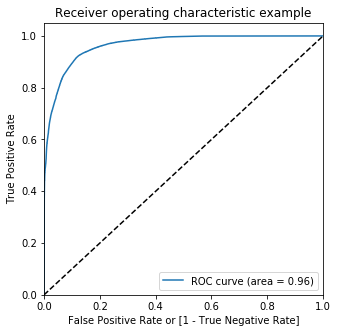

Computing Predictions based on threshold value of  0.40663401769840035  and then computing below metrics

Train Accuracy:  0.9001688433726464
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90    199020
           1       0.89      0.92      0.90    198982

    accuracy                           0.90    398002
   macro avg       0.90      0.90      0.90    398002
weighted avg       0.90      0.90      0.90    398002

Train Confusion Matrix:
 [[175564  23456]
 [ 16277 182705]]


In [352]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(logreg_adasyn, X_train_adasyn, y_train_adasyn)

Test AUC: 88.65%


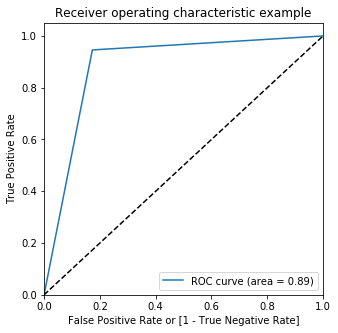

Accuracy on Test Dataset:  0.8272532565570029
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     85295
           1       0.01      0.95      0.02       148

    accuracy                           0.83     85443
   macro avg       0.50      0.89      0.46     85443
weighted avg       1.00      0.83      0.90     85443

Confusion Matrix on Test Dataset:
 [[70543 14752]
 [    8   140]]


In [353]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(logreg_adasyn, threshold_train_val)

#### Logistic Regression Model Summary

| Model                | Train Dataset       | Hyperparameters              | Train AUC   | Threshold | Test AUC |
| :-------------       | :-------------      | :----------:                 | -----------: | -----------: | -----------: |
|  Logistic Regression |  Imbalanced         | Default                      | 98.30%   | 0.003 | 91.44% |
|  Logistic Regression |  Imbalanced         | {'C': 0.1, 'penalty': 'l1'}  | 98.42%   | 0.003 | 91.96% |
|  Logistic Regression |  Random Oversampler | {'C': 100, 'penalty': 'l2'}  | 98.82%   | 0.632 | 92.27% |
|  Logistic Regression |  SMOTE              | {'C': 100, 'penalty': 'l2'}  | 98.87%   | 0.528 | 92.06% |
|  Logistic Regression |  ADASYN             | {'C': 0.01, 'penalty': 'l2'} | 96.48%   | 0.407 | 88.65% |

### K-Nearest Neighbours

In [393]:
knn_dt=KNeighborsClassifier()
knn_dt.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Train AUC: 99.99%
Train ROC Curve Threshold: 0.200


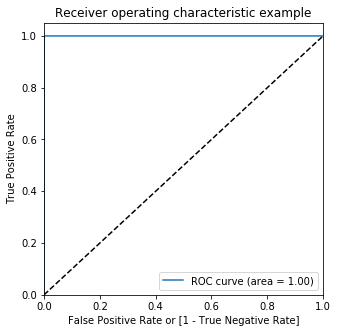

Computing Predictions based on threshold value of  0.2  and then computing below metrics

Train Accuracy:  0.9996037398928593
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.92      0.84      0.88       344

    accuracy                           1.00    199364
   macro avg       0.96      0.92      0.94    199364
weighted avg       1.00      1.00      1.00    199364

Train Confusion Matrix:
 [[198995     25]
 [    54    290]]


In [394]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(knn_dt, X_train, y_train)

Test AUC: 88.84%


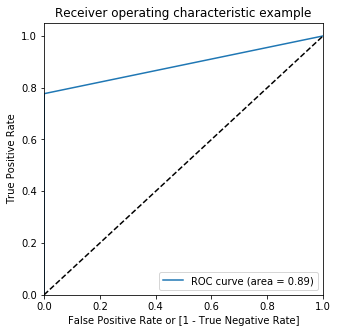

Accuracy on Test Dataset:  0.9993211848834895
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.78      0.80       148

    accuracy                           1.00     85443
   macro avg       0.91      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85270    25]
 [   33   115]]


In [395]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(knn_dt, threshold_train_val)

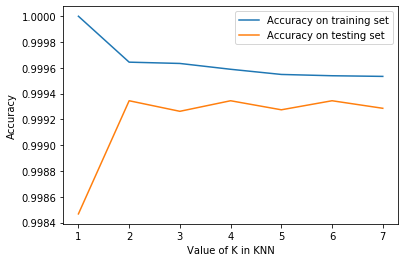

In [201]:
k_range = list(range(1,8,2))
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [396]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Train AUC: 99.99%
Train ROC Curve Threshold: 0.167


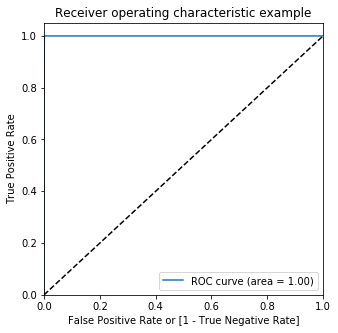

Computing Predictions based on threshold value of  0.16666666666666666  and then computing below metrics

Train Accuracy:  0.9995836760899661
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.90      0.86      0.88       344

    accuracy                           1.00    199364
   macro avg       0.95      0.93      0.94    199364
weighted avg       1.00      1.00      1.00    199364

Train Confusion Matrix:
 [[198986     34]
 [    49    295]]


In [397]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(knn, X_train, y_train)

Test AUC: 89.17%


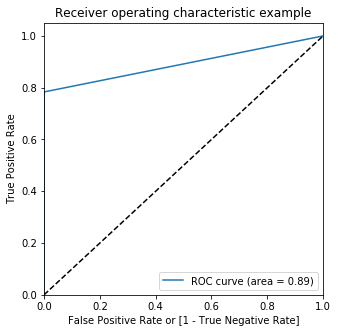

Accuracy on Test Dataset:  0.9992860737567735
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.78      0.79       148

    accuracy                           1.00     85443
   macro avg       0.90      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85266    29]
 [   32   116]]


In [399]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(knn, threshold_train_val)

#### Balanced Dataset

Random Oversampling

In [423]:
# Create the parameter grid based
param_grid = {'n_neighbors': [3]}
# Create a based model
knn_ros = KNeighborsClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = knn_ros, 
                           param_grid = param_grid,
                           cv=StratifiedKFold(5).split(X_train_ros, y_train_ros), 
                           scoring="roc_auc",
                           return_train_score=True, 
                           n_jobs = -1,
                           verbose = 1)

In [424]:
grid_search.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 51.7min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A350F91C8>,
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1, param_grid={'n_neighbors': [3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [425]:
# printing the optimal  score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9998819214149332 using {'n_neighbors': 3}


In [426]:
# model with the best hyperparameters
knn_ros=KNeighborsClassifier(n_neighbors=3)
knn_ros.fit(X_train_ros,y_train_ros)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Train AUC: 100.00%
Train ROC Curve Threshold: 1.000


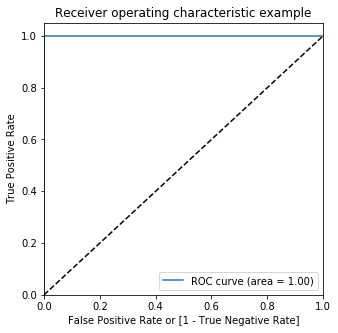

Computing Predictions based on threshold value of  1.0  and then computing below metrics

Train Accuracy:  0.5
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67    199020
           1       0.00      0.00      0.00    199020

    accuracy                           0.50    398040
   macro avg       0.25      0.50      0.33    398040
weighted avg       0.25      0.50      0.33    398040

Train Confusion Matrix:
 [[199020      0]
 [199020      0]]


In [427]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(knn_ros, X_train_ros, y_train_ros)

Test AUC: 50.00%


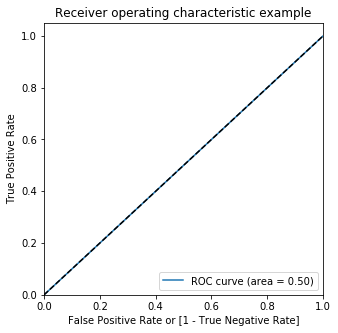

Accuracy on Test Dataset:  0.9982678510820079
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85295     0]
 [  148     0]]


In [428]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(knn_ros, threshold_train_val)

In [400]:
knn_ros=KNeighborsClassifier(n_neighbors=3)
knn_ros.fit(X_train_ros,y_train_ros)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Train AUC: 100.00%
Train ROC Curve Threshold: 1.000


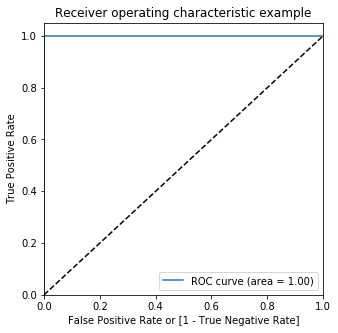

Computing Predictions based on threshold value of  1.0  and then computing below metrics

Train Accuracy:  0.5
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67    199020
           1       0.00      0.00      0.00    199020

    accuracy                           0.50    398040
   macro avg       0.25      0.50      0.33    398040
weighted avg       0.25      0.50      0.33    398040

Train Confusion Matrix:
 [[199020      0]
 [199020      0]]


In [401]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(knn_ros, X_train_ros, y_train_ros)

Test AUC: 50.00%


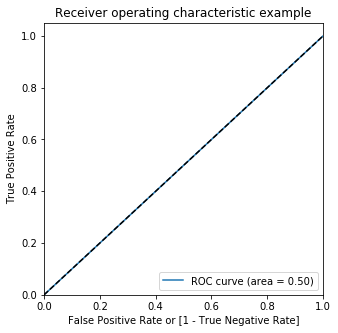

Accuracy on Test Dataset:  0.9982678510820079
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85295     0]
 [  148     0]]


In [402]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(knn_ros, threshold_train_val)

SMOTE

In [429]:
knn_smote=KNeighborsClassifier(n_neighbors=3)
knn_smote.fit(X_train_smote,y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Train AUC: 100.00%
Train ROC Curve Threshold: 1.000


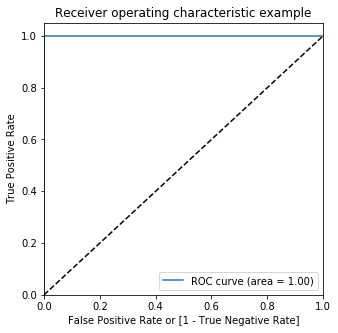

Computing Predictions based on threshold value of  1.0  and then computing below metrics

Train Accuracy:  0.5
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67    199020
           1       0.00      0.00      0.00    199020

    accuracy                           0.50    398040
   macro avg       0.25      0.50      0.33    398040
weighted avg       0.25      0.50      0.33    398040

Train Confusion Matrix:
 [[199020      0]
 [199020      0]]


In [430]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(knn_smote, X_train_smote, y_train_smote)

Test AUC: 50.00%


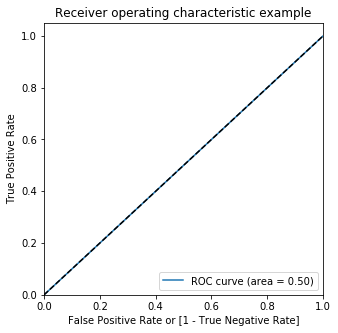

Accuracy on Test Dataset:  0.9982678510820079
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85295     0]
 [  148     0]]


In [431]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(knn_smote, threshold_train_val)

ADASYN

In [432]:
knn_adasyn=KNeighborsClassifier(n_neighbors=3)
knn_adasyn.fit(X_train_adasyn,y_train_adasyn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Train AUC: 100.00%
Train ROC Curve Threshold: 1.000


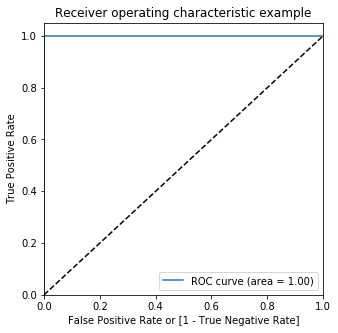

Computing Predictions based on threshold value of  1.0  and then computing below metrics

Train Accuracy:  0.5000477384535756
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67    199020
           1       0.00      0.00      0.00    198982

    accuracy                           0.50    398002
   macro avg       0.25      0.50      0.33    398002
weighted avg       0.25      0.50      0.33    398002

Train Confusion Matrix:
 [[199020      0]
 [198982      0]]


In [433]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(knn_adasyn, X_train_adasyn, y_train_adasyn)

Test AUC: 50.00%


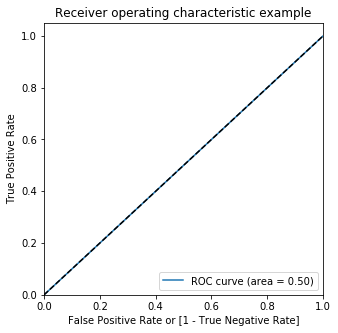

Accuracy on Test Dataset:  0.9982678510820079
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85295     0]
 [  148     0]]


In [434]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(knn_adasyn, threshold_train_val)

#### KNN Model Summary

| Model                | Train Dataset       | Hyperparameters              | Train AUC   | Threshold | Test AUC
| :-------------       | :-------------      | :----------:                 | -----------: | -----------: |-----------: |
| K-Nearest Neighbours |  Imbalanced         | {'n_neighbors'=3}  | 100.00%   | 0.5 | 89.11% |
| K-Nearest Neighbours |  Random Oversampler | {'n_neighbors'=3}   | 100.00%   | 1 | 50% |
| K-Nearest Neighbours |  SMOTE              | {'n_neighbors'=3}   | 100.00%   | 1 | 50%|
| K-Nearest Neighbours |  ADASYN             | {'n_neighbors'=3}  | 100.00%   | 1 | 50%|

### Decision Tree

In [63]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.

dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Train AUC: 92.29%
Train ROC Curve Threshold: 0.015


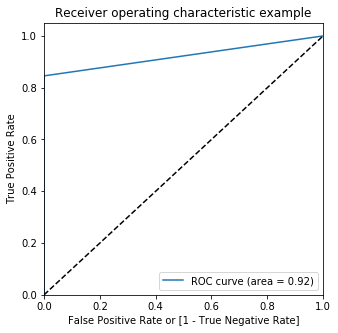

Computing Predictions based on threshold value of  0.015037593984962405  and then computing below metrics

Train Accuracy:  0.9992225276378884
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.74      0.84      0.79       344

    accuracy                           1.00    199364
   macro avg       0.87      0.92      0.89    199364
weighted avg       1.00      1.00      1.00    199364

Train Confusion Matrix:
 [[198920    100]
 [    55    289]]


In [355]:
threshold_train_val = evaluation_metrics_train(dt_default, X_train, y_train)

Test AUC: 79.34%


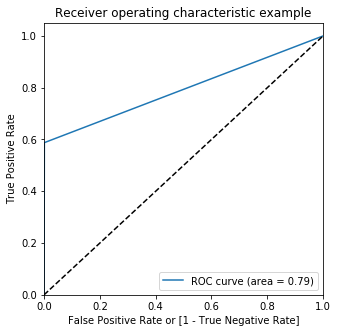

Accuracy on Test Dataset:  0.9982327399552918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.49      0.59      0.54       148

    accuracy                           1.00     85443
   macro avg       0.75      0.79      0.77     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[85205    90]
 [   61    87]]


In [356]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(dt_default, threshold_train_val)

#### Decision Tree Hyperparameter Tuning

In [65]:
def dt_max_depth(X_train, y_train):
    # parameters to build the model on
    parameters = {'max_depth': range(1, 10, 2)}

    # instantiate the model
    dtree = DecisionTreeClassifier(criterion = "gini", 
                                   random_state = 100)

    # fit tree on training data
    tree = GridSearchCV(dtree, parameters, 
                        cv=StratifiedKFold(5).split(X_train, y_train), 
                       scoring="roc_auc", return_train_score=True)
    tree.fit(X_train, y_train)
    
    scores = tree.cv_results_

    # plotting roc_auc with max_depth
    plt.figure(figsize=(8,5))
    plt.plot(scores["param_max_depth"], 
             scores["mean_train_score"], 
             label="training")
    plt.plot(scores["param_max_depth"], 
             scores["mean_test_score"], 
             label="test")
    plt.xlabel("max_depth")
    plt.ylabel("roc_auc")
    plt.legend()
    plt.show()

In [66]:
def dt_min_samples_leaf(X_train, y_train):
    # parameters to build the model on
    parameters = {'min_samples_leaf': range(5, 200, 40)}

    # instantiate the model
    dtree = DecisionTreeClassifier(criterion = "gini", 
                                   random_state = 100)

    # fit tree on training data
    tree = GridSearchCV(dtree, parameters, 
                        cv=StratifiedKFold(5).split(X_train, y_train), 
                       scoring="roc_auc", return_train_score=True)
    tree.fit(X_train, y_train)
    
    scores = tree.cv_results_

    # plotting roc_auc with max_depth
    plt.figure(figsize=(8,5))
    plt.plot(scores["param_min_samples_leaf"], 
             scores["mean_train_score"], 
             label="training")
    plt.plot(scores["param_min_samples_leaf"], 
             scores["mean_test_score"], 
             label="test")
    plt.xlabel("min_samples_leaf")
    plt.ylabel("roc_auc")
    plt.legend()
    plt.show()

In [67]:
def dt_min_samples_split(X_train, y_train):
    # parameters to build the model on
    parameters = {'min_samples_split': range(5, 200, 40)}

    # instantiate the model
    dtree = DecisionTreeClassifier(criterion = "gini", 
                                   random_state = 100)

    # fit tree on training data
    tree = GridSearchCV(dtree, parameters, 
                        cv=StratifiedKFold(5).split(X_train, y_train), 
                       scoring="roc_auc", return_train_score=True)
    tree.fit(X_train, y_train)
    
    scores = tree.cv_results_

    # plotting roc 
    plt.figure(figsize=(8,5))
    plt.plot(scores["param_min_samples_split"], 
             scores["mean_train_score"], 
             label="training")
    plt.plot(scores["param_min_samples_split"], 
             scores["mean_test_score"], 
             label="test")
    plt.xlabel("min_samples_split")
    plt.ylabel("roc_auc")
    plt.legend()
    plt.show()

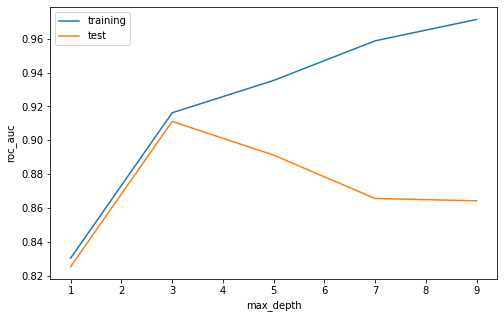

In [68]:
dt_max_depth(X_train, y_train)

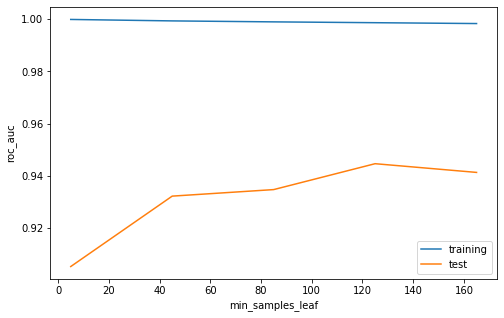

In [69]:
dt_min_samples_leaf(X_train, y_train)

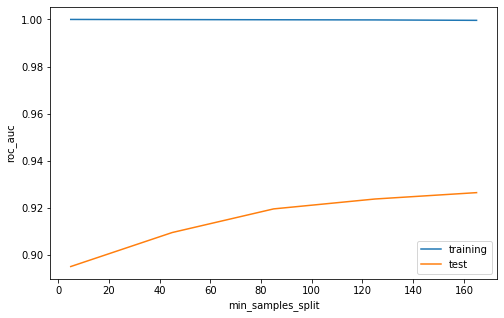

In [70]:
dt_min_samples_split(X_train, y_train)

In [71]:
# Create the parameter grid 
param_grid = {
    'max_depth': [3,6],
    'min_samples_leaf': range(40, 120, 40),
    'min_samples_split': range(50, 100, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train, y_train), 
                       scoring="roc_auc", return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.7min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A36DCAE48>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'], 'max_dep

In [72]:
# printing the optimal score and hyperparameters
print("best score", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best score 0.9493174947590095
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=80, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 80, 'min_samples_split': 50}


In [207]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=80,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=80, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

Train AUC: 99.19%
Train ROC Curve Threshold: 0.011


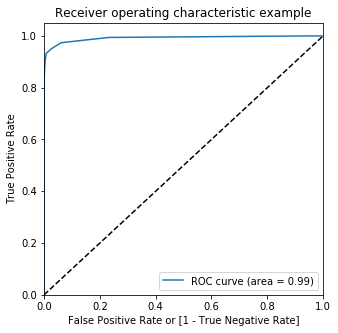

Computing Predictions based on threshold value of  0.011049723756906077  and then computing below metrics

Train Accuracy:  0.9945978210710058
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    199020
           1       0.23      0.92      0.37       344

    accuracy                           0.99    199364
   macro avg       0.62      0.96      0.68    199364
weighted avg       1.00      0.99      1.00    199364

Train Confusion Matrix:
 [[197972   1048]
 [    29    315]]


In [357]:
threshold_train_val = evaluation_metrics_train(clf_gini, X_train, y_train)

Test AUC: 91.70%


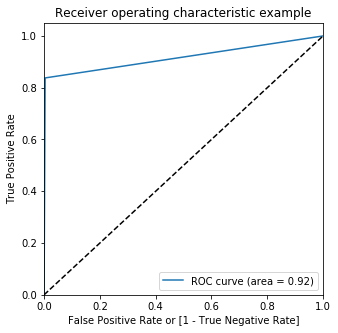

Accuracy on Test Dataset:  0.9958685907564107
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.27      0.84      0.41       148

    accuracy                           1.00     85443
   macro avg       0.64      0.92      0.71     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[84966   329]
 [   24   124]]


In [358]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(clf_gini, threshold_train_val)

#### Handling Data Imbalance

Random Oversampling

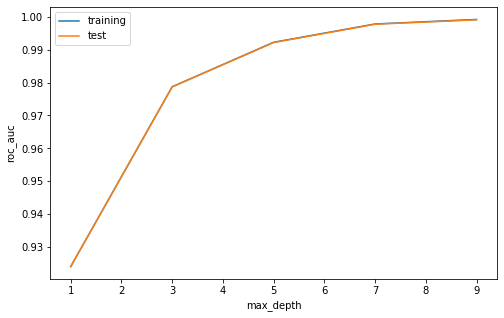

In [75]:
dt_max_depth(X_train_ros, y_train_ros)

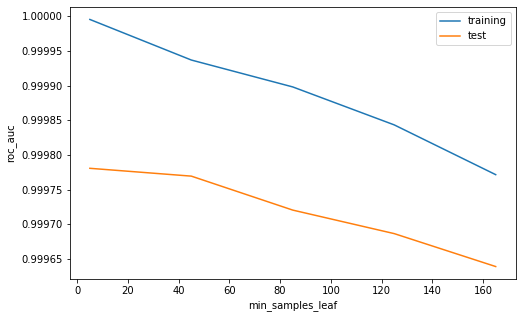

In [76]:
dt_min_samples_leaf(X_train_ros, y_train_ros)

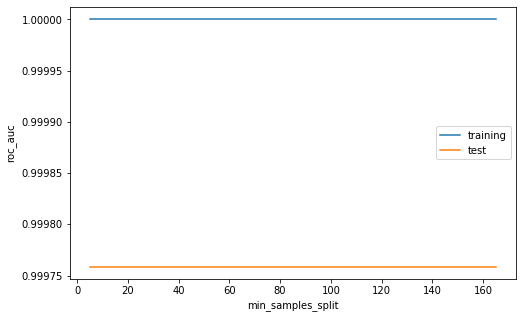

In [77]:
dt_min_samples_split(X_train_ros, y_train_ros)

In [78]:
# Create the parameter grid 
param_grid = {
    'max_depth': [3,6],
    'min_samples_leaf': range(40, 120, 40),
    'min_samples_split': range(50, 100, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train_ros, y_train_ros), 
                       scoring="roc_auc", return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.5min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A34987EC8>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'], 'max_dep

In [79]:
# printing the optimal score and hyperparameters
print("best score", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best score 0.9969545326036884
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50}


In [209]:
# model with optimal hyperparameters
clf_gini_ros = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=40,
                                  min_samples_split=50)
clf_gini_ros.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

Train AUC: 99.71%
Train ROC Curve Threshold: 0.830


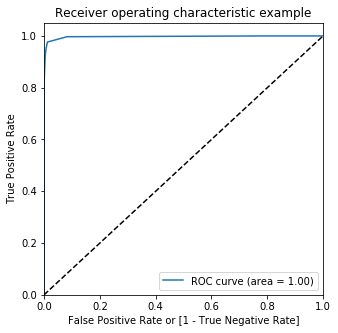

Computing Predictions based on threshold value of  0.8298550724637681  and then computing below metrics

Train Accuracy:  0.9764119184001608
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98    199020
           1       0.99      0.96      0.98    199020

    accuracy                           0.98    398040
   macro avg       0.98      0.98      0.98    398040
weighted avg       0.98      0.98      0.98    398040

Train Confusion Matrix:
 [[197181   1839]
 [  7550 191470]]


In [359]:
threshold_train_val = evaluation_metrics_train(clf_gini_ros, X_train_ros, y_train_ros)

Test AUC: 90.46%


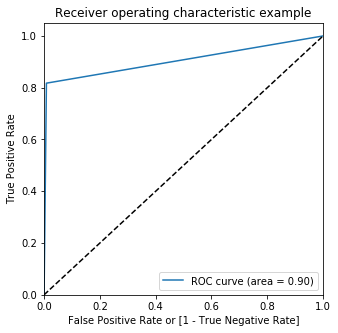

Accuracy on Test Dataset:  0.991292440574418
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.82      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.90      0.62     85443
weighted avg       1.00      0.99      0.99     85443

Confusion Matrix on Test Dataset:
 [[84578   717]
 [   27   121]]


In [360]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(clf_gini_ros, threshold_train_val)

SMOTE

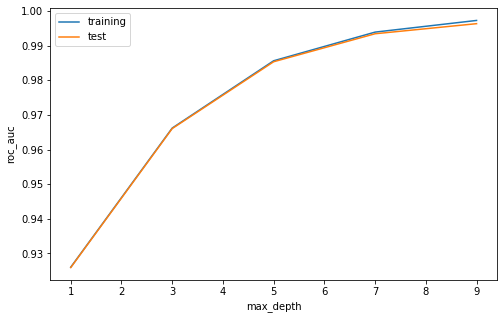

In [82]:
dt_max_depth(X_train_smote, y_train_smote)

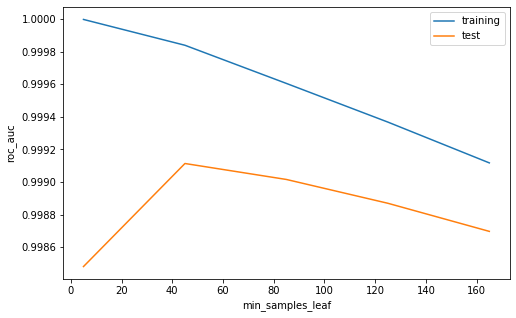

In [83]:
dt_min_samples_leaf(X_train_smote, y_train_smote)

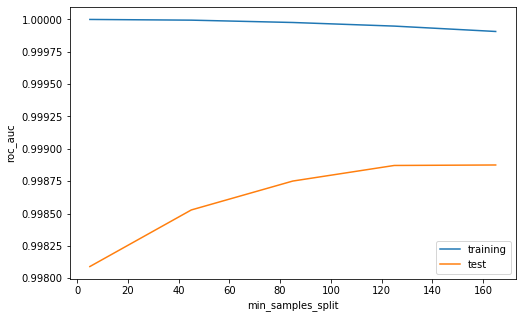

In [84]:
dt_min_samples_split(X_train_smote, y_train_smote)

In [85]:
# Create the parameter grid 
param_grid = {
    'max_depth': [5,7],
    'min_samples_leaf': range(40, 120, 40),
    'min_samples_split': range(50, 100, 50),
    'criterion': ["entropy", "gini"]
}
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train_smote, y_train_smote), 
                       scoring="roc_auc", return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  7.3min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A3B87F5C8>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'], 'max_dep

In [86]:
# printing the optimal score and hyperparameters
print("best score", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best score 0.996218968864934
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 50}


In [211]:
# model with optimal hyperparameters
clf_gini_smote = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=7, 
                                  min_samples_leaf=40,
                                  min_samples_split=50)
clf_gini_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

Train AUC: 99.65%
Train ROC Curve Threshold: 0.550


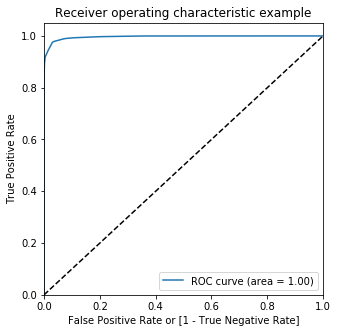

Computing Predictions based on threshold value of  0.55  and then computing below metrics

Train Accuracy:  0.9727263591598835
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97    199020
           1       0.97      0.98      0.97    199020

    accuracy                           0.97    398040
   macro avg       0.97      0.97      0.97    398040
weighted avg       0.97      0.97      0.97    398040

Train Confusion Matrix:
 [[193035   5985]
 [  4871 194149]]


In [361]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(clf_gini_smote, X_train_smote, y_train_smote)

Test AUC: 91.02%


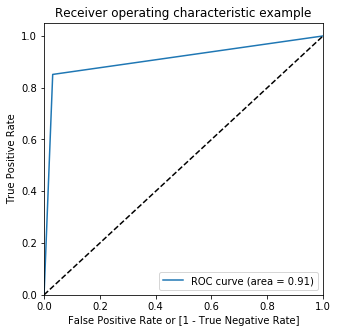

Accuracy on Test Dataset:  0.9688681343117634
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.85      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.91      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Confusion Matrix on Test Dataset:
 [[82657  2638]
 [   22   126]]


In [362]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(clf_gini_smote, threshold_train_val)

ADASYN

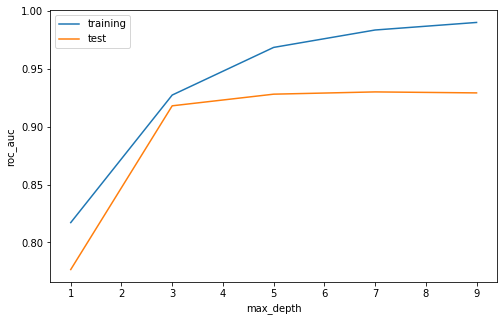

In [89]:
dt_max_depth(X_train_adasyn, y_train_adasyn)

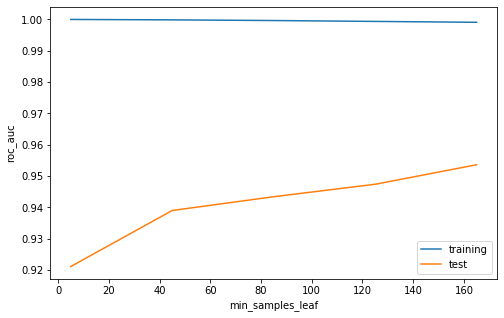

In [90]:
dt_min_samples_leaf(X_train_adasyn, y_train_adasyn)

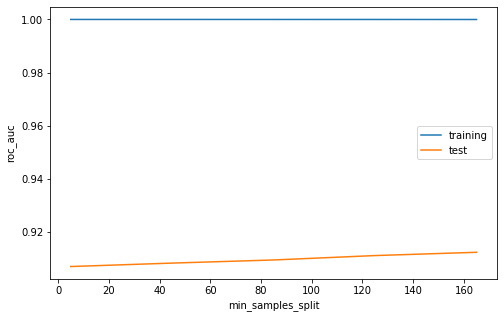

In [91]:
dt_min_samples_split(X_train_adasyn, y_train_adasyn)

In [92]:
# Create the parameter grid 
param_grid = {
    'max_depth': [3,6],
    'min_samples_leaf': range(40, 120, 40),
    'min_samples_split': range(50, 100, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train_adasyn, y_train_adasyn), 
                       scoring="roc_auc", return_train_score=True, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.6min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A36DCAB48>,
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'], 'max_dep

In [93]:
# printing the optimal score and hyperparameters
print("best score", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best score 0.9402515183575932
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=80, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 80, 'min_samples_split': 50}


In [213]:
# model with optimal hyperparameters
clf_gini_adasyn = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=80,
                                  min_samples_split=50)
clf_gini_adasyn.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=80, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

Train AUC: 98.05%
Train ROC Curve Threshold: 0.576


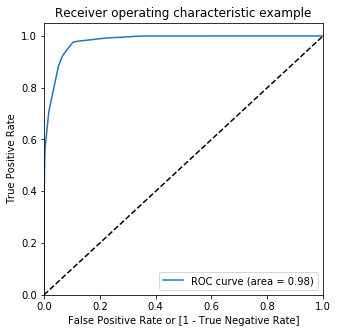

Computing Predictions based on threshold value of  0.5757393913416202  and then computing below metrics

Train Accuracy:  0.9316058713272798
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93    199020
           1       0.92      0.94      0.93    198982

    accuracy                           0.93    398002
   macro avg       0.93      0.93      0.93    398002
weighted avg       0.93      0.93      0.93    398002

Train Confusion Matrix:
 [[183491  15529]
 [ 11692 187290]]


In [363]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(clf_gini_adasyn, X_train_adasyn, y_train_adasyn)

Test AUC: 89.64%


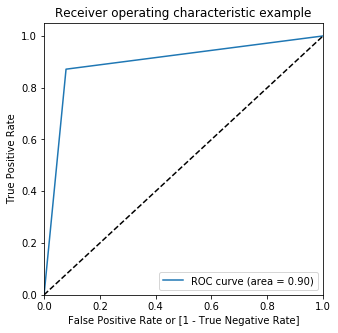

Accuracy on Test Dataset:  0.9211755205224536
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.87      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.90      0.50     85443
weighted avg       1.00      0.92      0.96     85443

Confusion Matrix on Test Dataset:
 [[78579  6716]
 [   19   129]]


In [364]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(clf_gini_adasyn, threshold_train_val)

#### Decision Tree Model Summary

| Model                | Train Dataset       | Hyperparameters              | Train AUC   | Threshold | Test AUC | 
| :-------------       | :-------------      | :----------:                 | -----------: |-----------: |-----------: |
|  Decision Tree |  Imbalanced         | Default                      | 92.29%   | 0.015 | 79.34%   |
|  Decision Tree |  Imbalanced         | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 80, 'min_samples_split': 50} | 99.19%  | 0.011 | 91.70%   |
|  Decision Tree |  Random Oversampler | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50}  | 99.71%   | 0.830 | 90.46%   |
|  Decision Tree |  SMOTE              | {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 50}  | 99.65%   | 0.550 | 91.02%   |
|  Decision Tree |  ADASYN             | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 80, 'min_samples_split': 50}| 98.05%   | 0.576 | 89.64%   |

### Random Forest

#### Random Forest with Default Paramaters & Imbalanced Dataset

In [96]:
# Running the random forest with default parameters.
rfc_dt = RandomForestClassifier(random_state=42)
rfc_dt.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Train AUC: 100.00%
Train ROC Curve Threshold: 0.200


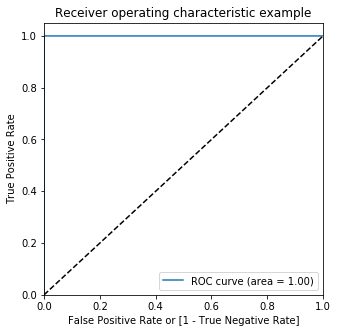

Computing Predictions based on threshold value of  0.2  and then computing below metrics

Train Accuracy:  0.9999347926405971
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.97      1.00      0.98       344

    accuracy                           1.00    199364
   macro avg       0.98      1.00      0.99    199364
weighted avg       1.00      1.00      1.00    199364

Train Confusion Matrix:
 [[199008     12]
 [     1    343]]


In [365]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(rfc_dt, X_train, y_train)

Test AUC: 91.71%


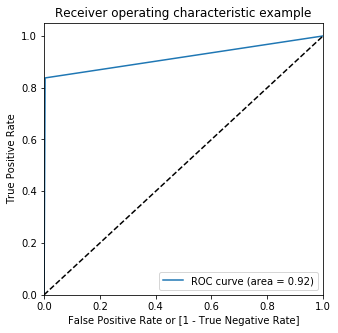

Accuracy on Test Dataset:  0.9960324426810856
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.28      0.84      0.42       148

    accuracy                           1.00     85443
   macro avg       0.64      0.92      0.71     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix on Test Dataset:
 [[84980   315]
 [   24   124]]


In [366]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(rfc_dt, threshold_train_val)

#### Hyperparameter Tuning

In [107]:
def rf_tuning_max_depth(X_train, y_train):
    # Tuning max_depth
    # parameters to build the model on
    parameters = {'max_depth': range(2, 20, 5)}

    # instantiate the model
    rf = RandomForestClassifier()

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                      cv=StratifiedKFold(5).split(X_train, y_train), 
                      scoring="roc_auc",
                      return_train_score=True)
    rf.fit(X_train, y_train)

    scores = rf.cv_results_

    # plotting roc_auc with max_depth
    plt.figure(figsize=(8, 5))
    plt.plot(scores["param_max_depth"], 
             scores["mean_train_score"], 
             label="training")
    plt.plot(scores["param_max_depth"], 
             scores["mean_test_score"], 
             label="test")
    plt.xlabel("max_depth")
    plt.ylabel("roc_auc")
    plt.legend()
    plt.show()

In [108]:
def rf_tuning_n_estimators(X_train, y_train):
    #Tuning n_estimators
    # parameters to build the model on
    parameters = {'n_estimators': range(100, 300, 100)}

    # instantiate the model
    rf = RandomForestClassifier(max_depth=4)

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                      cv=StratifiedKFold(5).split(X_train, y_train), 
                      scoring="roc_auc",
                      return_train_score=True)
    rf.fit(X_train, y_train)

    # scores of GridSearch CV
    scores = rf.cv_results_

    # plotting roc_auc with n_estimators
    plt.figure(figsize=(8, 5))
    plt.plot(scores["param_n_estimators"], 
             scores["mean_train_score"], 
             label="training")
    plt.plot(scores["param_n_estimators"], 
             scores["mean_test_score"], 
             label="test")
    plt.xlabel("n_estimators")
    plt.ylabel("roc_auc")
    plt.legend()
    plt.show()

In [109]:
def rf_tuning_max_features(X_train, y_train):
    #Tuning max_features
    # parameters to build the model on
    parameters = {'max_features': [2, 4, 8, 10]}

    # instantiate the model
    rf = RandomForestClassifier(max_depth=4)

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                      cv=StratifiedKFold(5).split(X_train, y_train), 
                      scoring="roc_auc",
                      return_train_score=True)
    rf.fit(X_train, y_train)

    # scores of GridSearch CV
    scores = rf.cv_results_

    # plotting roc_auc with max_features
    plt.figure(figsize=(8, 5))
    plt.plot(scores["param_max_features"], 
             scores["mean_train_score"], 
             label="training")
    plt.plot(scores["param_max_features"], 
             scores["mean_test_score"], 
             label="test")
    plt.xlabel("max_features")
    plt.ylabel("roc_auc")
    plt.legend()
    plt.show()


In [110]:
def rf_tuning_min_samples_leaf(X_train, y_train):
    # Tuning min_samples_leaf

    # parameters to build the model on
    parameters = {'min_samples_leaf': range(100, 400, 50)}

    # instantiate the model
    rf = RandomForestClassifier(max_depth=4)

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                      cv=StratifiedKFold(5).split(X_train, y_train), 
                      scoring="roc_auc",
                      return_train_score=True)
    rf.fit(X_train, y_train)

    # scores of GridSearch CV
    scores = rf.cv_results_

    # plotting roc_auc with min_samples_leaf
    plt.figure(figsize=(8, 5))
    plt.plot(scores["param_min_samples_leaf"], 
             scores["mean_train_score"], 
             label="training")
    plt.plot(scores["param_min_samples_leaf"], 
             scores["mean_test_score"], 
             label="test")
    plt.xlabel("min_samples_leaf")
    plt.ylabel("roc_auc")
    plt.legend()
    plt.show()

In [111]:
def rf_tuning_min_samples_split(X_train, y_train):
    # Tuning min_samples_leaf

    # parameters to build the model on
    parameters = {'min_samples_split': range(200, 500, 50)}

    # instantiate the model
    rf = RandomForestClassifier(max_depth=4)

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                      cv=StratifiedKFold(5).split(X_train, y_train), 
                      scoring="roc_auc",
                      return_train_score=True)
    rf.fit(X_train, y_train)

    # scores of GridSearch CV
    scores = rf.cv_results_

    # plotting roc_auc with min_samples_leaf
    plt.figure(figsize=(8, 5))
    plt.plot(scores["param_min_samples_split"], 
             scores["mean_train_score"], 
             label="training")
    plt.plot(scores["param_min_samples_split"], 
             scores["mean_test_score"], 
             label="test")
    plt.xlabel("min_samples_split")
    plt.ylabel("roc_auc")
    plt.legend()
    plt.show()

_Tuning max_depth_

find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


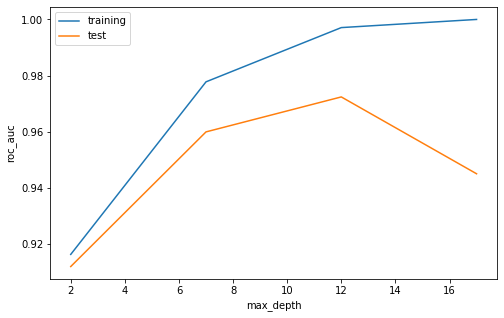

In [112]:
rf_tuning_max_depth(X_train, y_train)

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

_Tuning n_estimators_

find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

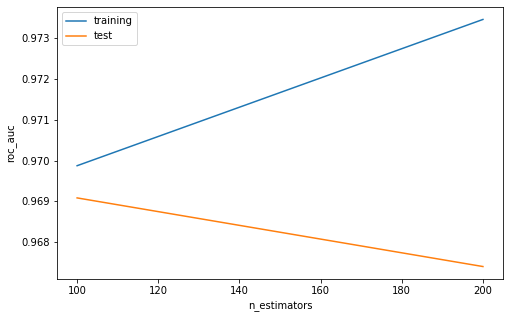

In [113]:
rf_tuning_n_estimators(X_train, y_train)

n_estimators of 100 seems the correct value

_Tuning max_features_

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

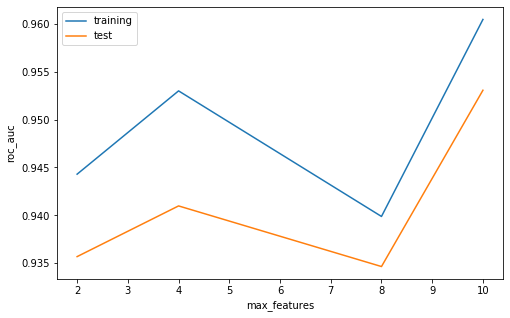

In [114]:
rf_tuning_max_features(X_train, y_train)

Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

_Tuning min_samples_leaf_

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

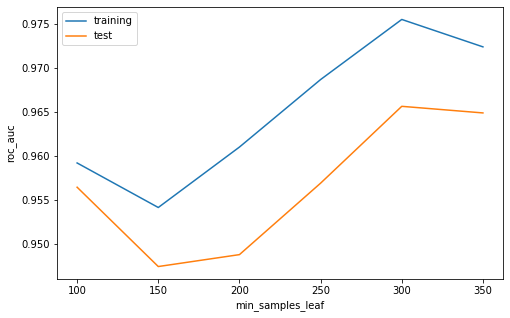

In [115]:
rf_tuning_min_samples_leaf(X_train, y_train)

model starts of overfit as you decrease the value of min_samples_leaf. 

_Tuning min_samples_split_

Let's now look at the performance of the ensemble as we vary min_samples_split.

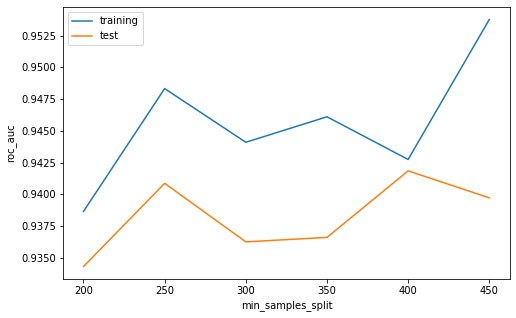

In [116]:
rf_tuning_min_samples_split(X_train, y_train)

Grid Search to Find Optimal Hyperparameters

In [117]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,7],
    'min_samples_leaf': [150],
    'min_samples_split': [250],
    'n_estimators': [100, 200], 
    'max_features': [4,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train, y_train), 
                  scoring="roc_auc",
                  return_train_score=True, n_jobs = -1,verbose = 1)

In [118]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 29.9min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A3B8F90C8>,
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [119]:
# printing the optimal  score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9803077094839691 using {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 250, 'n_estimators': 200}


In [120]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=250,
                             max_features=8,
                             n_estimators=200)

In [121]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train AUC: 99.22%
Train ROC Curve Threshold: 0.001


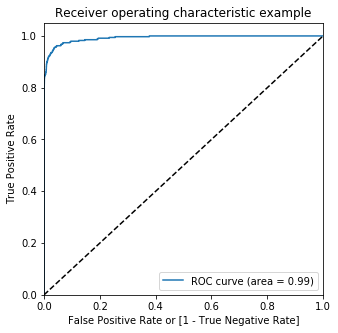

Computing Predictions based on threshold value of  0.0014211604813034254  and then computing below metrics

Train Accuracy:  0.96225998675789
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    199020
           1       0.04      0.95      0.08       344

    accuracy                           0.96    199364
   macro avg       0.52      0.96      0.53    199364
weighted avg       1.00      0.96      0.98    199364

Train Confusion Matrix:
 [[191512   7508]
 [    16    328]]


In [367]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(rfc, X_train, y_train)

Test AUC: 89.29%


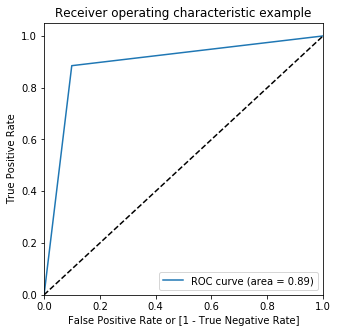

Accuracy on Test Dataset:  0.9007291410648034
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85295
           1       0.02      0.89      0.03       148

    accuracy                           0.90     85443
   macro avg       0.51      0.89      0.49     85443
weighted avg       1.00      0.90      0.95     85443

Confusion Matrix on Test Dataset:
 [[76830  8465]
 [   17   131]]


In [368]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(rfc, threshold_train_val)

#### Handling data imbalance

RANDOM OVERSAMPLING

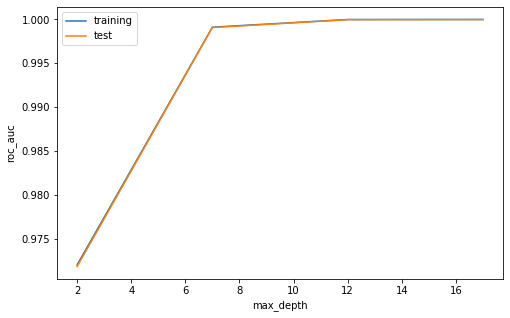

In [123]:
rf_tuning_max_depth(X_train_ros, y_train_ros)

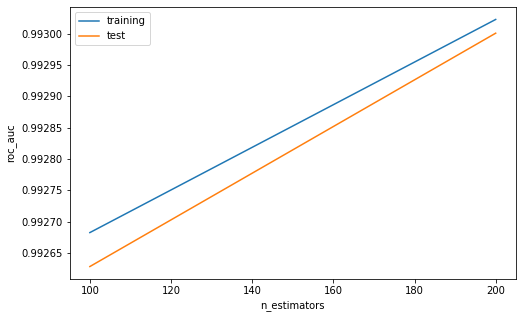

In [124]:
rf_tuning_n_estimators(X_train_ros, y_train_ros)

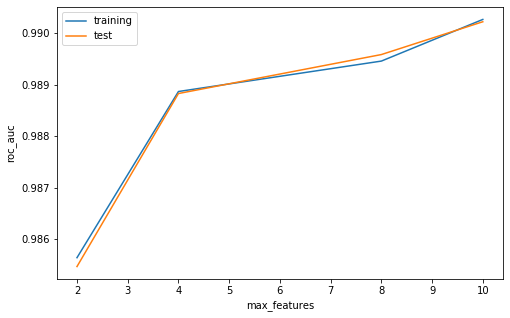

In [125]:
rf_tuning_max_features(X_train_ros, y_train_ros)

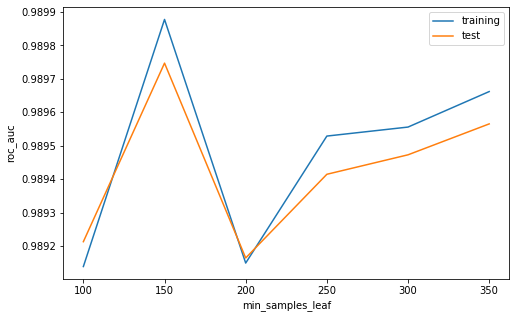

In [126]:
rf_tuning_min_samples_leaf(X_train_ros, y_train_ros)

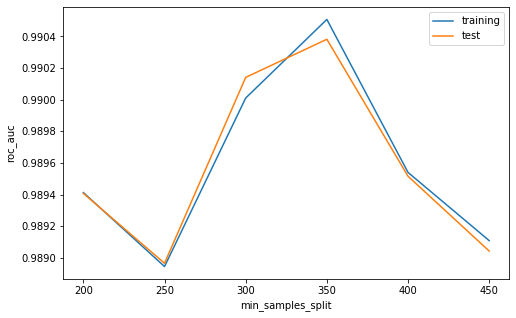

In [127]:
rf_tuning_min_samples_split(X_train_ros, y_train_ros)

In [128]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,7],
    'min_samples_leaf': [150],
    'min_samples_split': [300],
    'n_estimators': [100], 
    'max_features': [4,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train_ros, y_train_ros), 
                  scoring="roc_auc",
                  return_train_score=True, n_jobs = -1,verbose = 1)

In [129]:
# Fit the grid search to the data
grid_search.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 13.4min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A36DAA048>,
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [130]:
# printing the optimal  score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9991126518559168 using {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 100}


In [131]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_ros = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=8,
                             n_estimators=100)

In [238]:
# fit
rfc_ros.fit(X_train_ros,y_train_ros)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train AUC: 99.94%
Train ROC Curve Threshold: 0.297


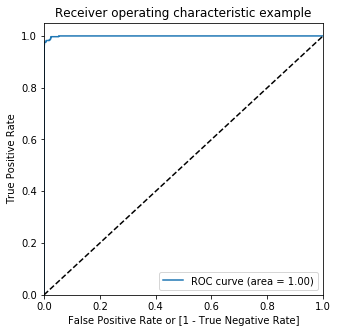

Computing Predictions based on threshold value of  0.2968166853520096  and then computing below metrics

Train Accuracy:  0.9860943623756406
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    199020
           1       0.99      0.98      0.99    199020

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040

Train Confusion Matrix:
 [[197600   1420]
 [  4115 194905]]


In [369]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(rfc_ros, X_train_ros, y_train_ros)

Test AUC: 92.67%


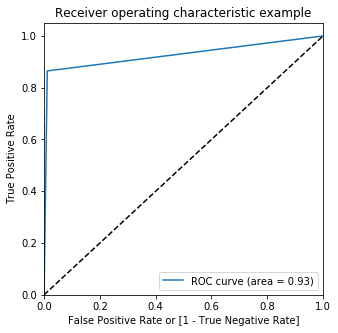

Accuracy on Test Dataset:  0.9884016244747961
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.86      0.21       148

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443

Confusion Matrix on Test Dataset:
 [[84324   971]
 [   20   128]]


In [370]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(rfc_ros, threshold_train_val)

SMOTE

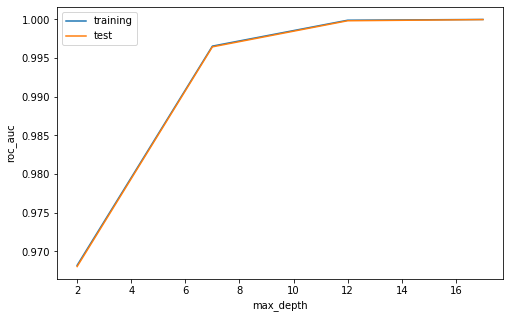

In [134]:
rf_tuning_max_depth(X_train_smote, y_train_smote)

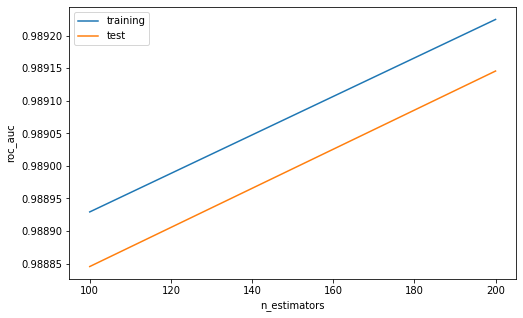

In [135]:
rf_tuning_n_estimators(X_train_smote, y_train_smote)

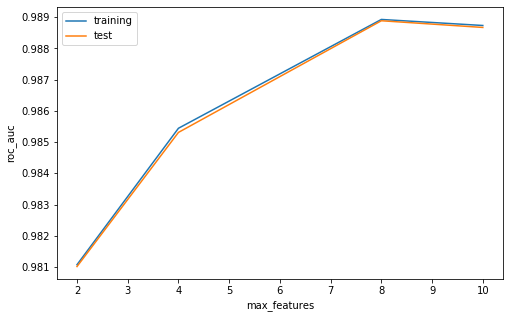

In [136]:
rf_tuning_max_features(X_train_smote, y_train_smote)

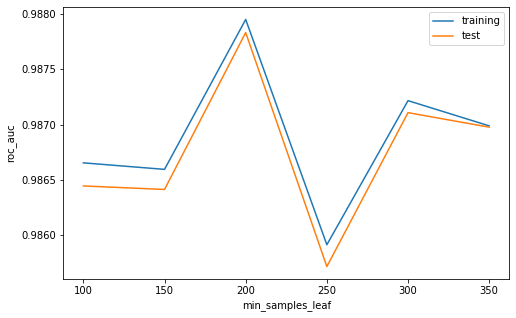

In [137]:
rf_tuning_min_samples_leaf(X_train_smote, y_train_smote)

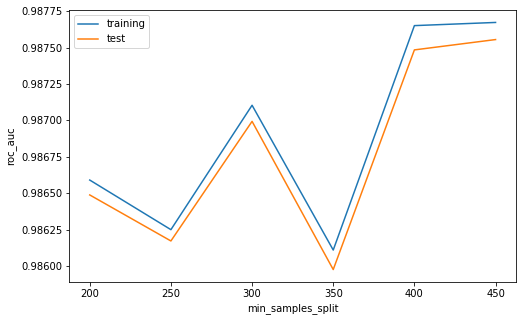

In [138]:
rf_tuning_min_samples_split(X_train_smote, y_train_smote)

In [139]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,7],
    'min_samples_leaf': [150],
    'min_samples_split': [200],
    'n_estimators': [100], 
    'max_features': [4,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train_smote, y_train_smote), 
                  scoring="roc_auc",
                  return_train_score=True, n_jobs = -1,verbose = 1)

In [140]:
# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 20.0min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A34987AC8>,
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [141]:
# printing the optimal  score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9971564072532437 using {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 100}


In [142]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_smote = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=100)

In [143]:
# fit
rfc_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train AUC: 99.72%
Train ROC Curve Threshold: 0.426


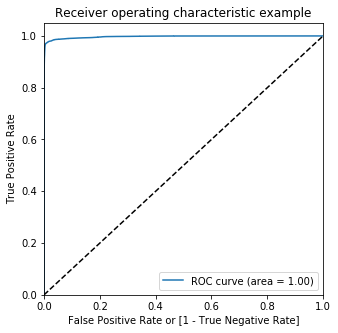

Computing Predictions based on threshold value of  0.4255579510412798  and then computing below metrics

Train Accuracy:  0.982310823032861
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    199020
           1       0.99      0.97      0.98    199020

    accuracy                           0.98    398040
   macro avg       0.98      0.98      0.98    398040
weighted avg       0.98      0.98      0.98    398040

Train Confusion Matrix:
 [[197678   1342]
 [  5699 193321]]


In [371]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(rfc_smote, X_train_smote, y_train_smote)

Test AUC: 92.71%


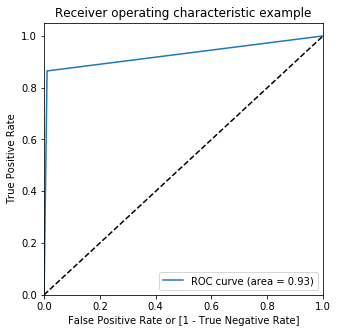

Accuracy on Test Dataset:  0.9890687358824012
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.86      0.22       148

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443

Confusion Matrix on Test Dataset:
 [[84381   914]
 [   20   128]]


In [372]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(rfc_smote, threshold_train_val)

ADASYN

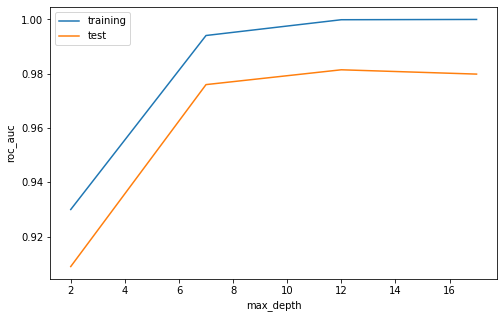

In [145]:
rf_tuning_max_depth(X_train_adasyn, y_train_adasyn)

max_depth of 7

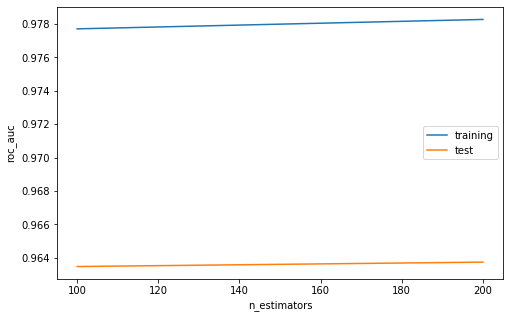

In [146]:
rf_tuning_n_estimators(X_train_adasyn, y_train_adasyn)

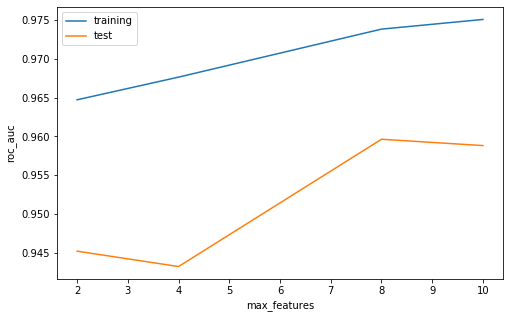

In [147]:
rf_tuning_max_features(X_train_adasyn, y_train_adasyn)

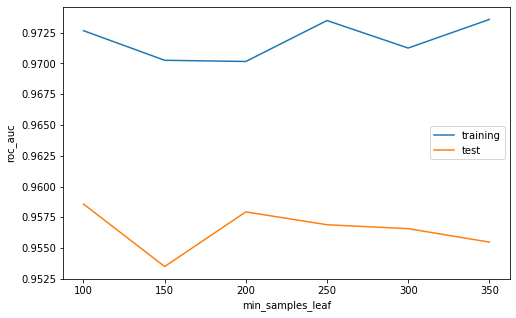

In [148]:
rf_tuning_min_samples_leaf(X_train_adasyn, y_train_adasyn)

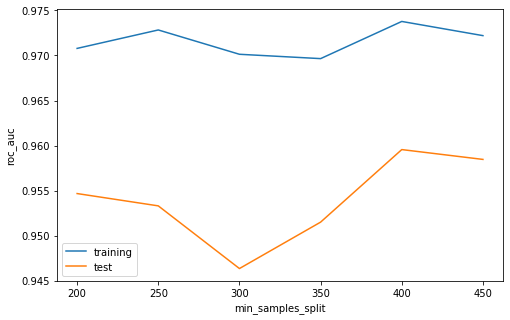

In [149]:
rf_tuning_min_samples_split(X_train_adasyn, y_train_adasyn)

In [150]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,7],
    'min_samples_leaf': [150],
    'min_samples_split': [300],
    'n_estimators': [100], 
    'max_features': [4,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv=StratifiedKFold(5).split(X_train_adasyn, y_train_adasyn), 
                  scoring="roc_auc",
                  return_train_score=True, n_jobs = -1,verbose = 1)

In [151]:
# Fit the grid search to the data
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 18.2min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A3B69E1C8>,
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [152]:
# printing the optimal  score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.9843485647102362 using {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 100}


In [241]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_adasyn = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=8,
                             n_estimators=100)

In [242]:
# fit
rfc_adasyn.fit(X_train_adasyn,y_train_adasyn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train AUC: 99.58%
Train ROC Curve Threshold: 0.555


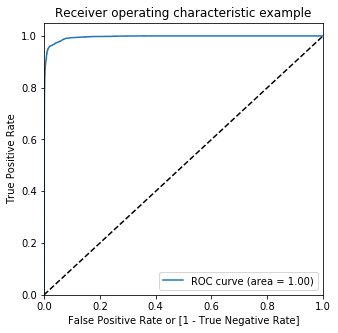

Computing Predictions based on threshold value of  0.5550832624805865  and then computing below metrics

Train Accuracy:  0.9697639710353214
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    199020
           1       0.98      0.96      0.97    198982

    accuracy                           0.97    398002
   macro avg       0.97      0.97      0.97    398002
weighted avg       0.97      0.97      0.97    398002

Train Confusion Matrix:
 [[195104   3916]
 [  8118 190864]]


In [373]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(rfc_adasyn, X_train_adasyn, y_train_adasyn)

Test AUC: 92.67%


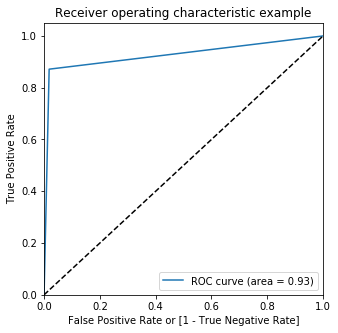

Accuracy on Test Dataset:  0.9816251770185972
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.87      0.14       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix on Test Dataset:
 [[83744  1551]
 [   19   129]]


In [374]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(rfc_adasyn, threshold_train_val)

#### Random Forest Model Summary

| Model                | Train Dataset       | Hyperparameters              | Train AUC   | Threshold | Test AUC
| :-------------       | :-------------      | :----------:                 | -----------: |-----------: |-----------: |
|  Random Forest |  Imbalanced         | Default                      | 100%   | 0.200 | 91.71%   | 
|  Random Forest |  Imbalanced         | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 250, 'n_estimators': 200}  | 99.22%   | 0.001 | 89.29% |
|  Random Forest |  Random Oversampler | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 100}  | 99.94%   | 0.297 | 92.67% |
|  Random Forest |  SMOTE              | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 100}  | 99.72%   | 0.426 | 92.71% |
|  Random Forest |  ADASYN             | {'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 100} | 99.58%   | 0.555 | 92.67% |

### XG Boost

#### XG Boost Model with Default Paramaters & Imbalanced Dataset

In [156]:
# fit model on training data with default hyperparameters
xgb_dt = XGBClassifier(random_state=0)
xgb_dt.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Train AUC: 99.82%
Train ROC Curve Threshold: 0.003


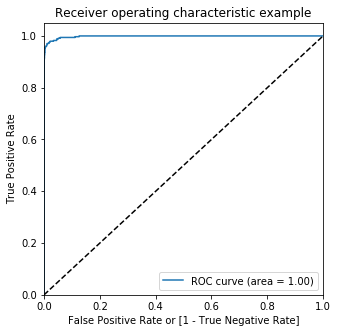

Computing Predictions based on threshold value of  0.0031281644  and then computing below metrics

Train Accuracy:  0.9886238237595554
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    199020
           1       0.13      0.97      0.23       344

    accuracy                           0.99    199364
   macro avg       0.56      0.98      0.61    199364
weighted avg       1.00      0.99      0.99    199364

Train Confusion Matrix:
 [[196763   2257]
 [    11    333]]


In [378]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(xgb_dt, X_train, y_train)

Test AUC: 92.50%


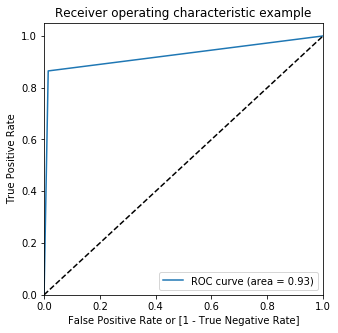

Accuracy on Test Dataset:  0.9849490303477172
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.09      0.86      0.17       148

    accuracy                           0.98     85443
   macro avg       0.55      0.93      0.58     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix on Test Dataset:
 [[84029  1266]
 [   20   128]]


In [379]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(xgb_dt, threshold_train_val)

#### XG Boost Model - Hyperparameter Tuning

Determining n_estimators

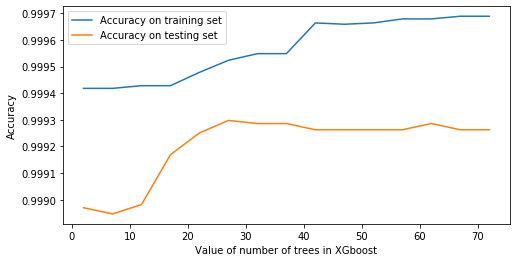

In [158]:
tree_range = range(2, 75, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.figure(figsize=(8,4))
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

Taking the value of n_estimators as 27

Tuning the hyperparameters using stratified k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [159]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
# folds = 3
kfolds = StratifiedKFold(5)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=27)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train, y_train),
                        verbose = 1,
                        return_train_score=True)

In [160]:
# fit the model
model_cv.fit(X_train, y_train)       

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.8min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A3BC705C8>,
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=27, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0

In [161]:
# printing the optimal score and hyperparameters
print('We can get score of',model_cv.best_score_,'using',model_cv.best_params_)

We can get score of 0.977003884425828 using {'learning_rate': 0.6, 'subsample': 0.9}


In [162]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [163]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')

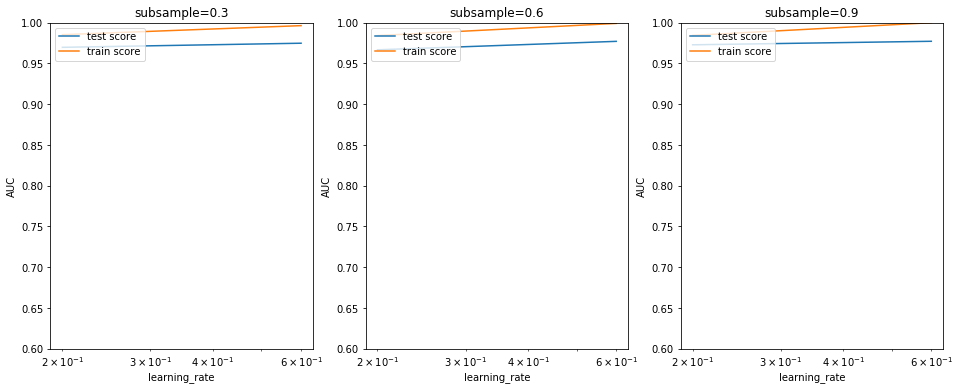

In [164]:
# # plotting
plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [390]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':27,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb = XGBClassifier(params = params)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 27,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

Train AUC: 99.82%
Train ROC Curve Threshold: 0.003


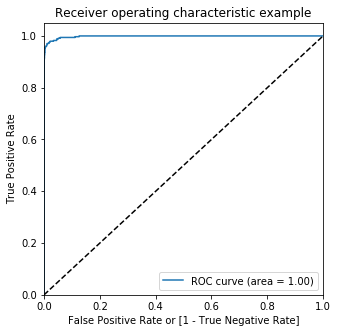

Computing Predictions based on threshold value of  0.0031281644  and then computing below metrics

Train Accuracy:  0.9886238237595554
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    199020
           1       0.13      0.97      0.23       344

    accuracy                           0.99    199364
   macro avg       0.56      0.98      0.61    199364
weighted avg       1.00      0.99      0.99    199364

Train Confusion Matrix:
 [[196763   2257]
 [    11    333]]


In [391]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(xgb, X_train, y_train)

Test AUC: 92.50%


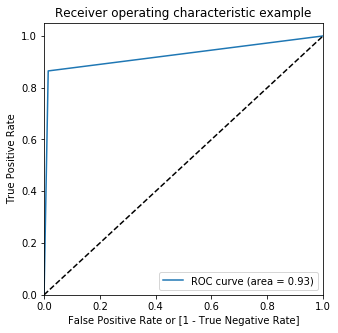

Accuracy on Test Dataset:  0.9849490303477172
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.09      0.86      0.17       148

    accuracy                           0.98     85443
   macro avg       0.55      0.93      0.58     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix on Test Dataset:
 [[84029  1266]
 [   20   128]]


In [392]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(xgb, threshold_train_val)

In [171]:
# feature importance
importance = dict(zip(X_train.columns, xgb.feature_importances_))

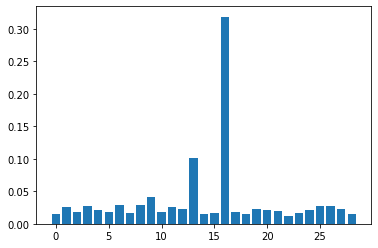

In [175]:
# plot
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

#### XG Boost Model after balancing data

Random Oversampling

In [176]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
# folds = 3
kfolds = StratifiedKFold(5)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=27)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train_ros, y_train_ros),
                        verbose = 1,
                        return_train_score=True)

In [177]:
# fit the model
model_cv.fit(X_train_ros, y_train_ros) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.0min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A3BC7DE48>,
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=27, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0

In [178]:
# printing the optimal  score and hyperparameters
print('We can get score of',model_cv.best_score_,'using',model_cv.best_params_)

We can get score of 0.9999030215016701 using {'learning_rate': 0.6, 'subsample': 0.9}


In [179]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [180]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')

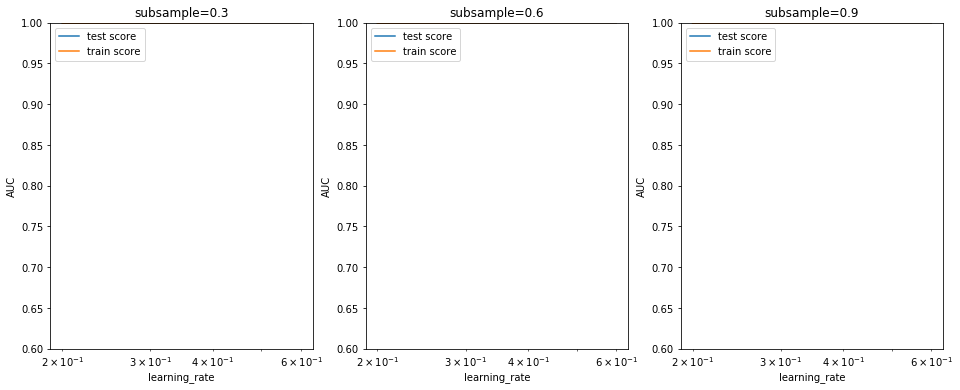

In [181]:
# # plotting
plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [182]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':27,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_ros = XGBClassifier(params = params)
xgb_model_ros.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 27,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

Train AUC: 99.98%
Train ROC Curve Threshold: 0.544


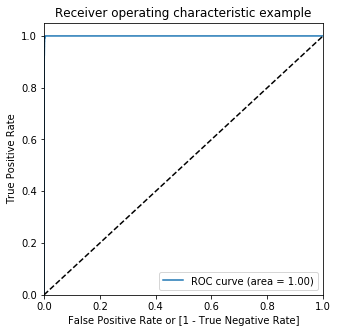

Computing Predictions based on threshold value of  0.5444247  and then computing below metrics

Train Accuracy:  0.9967088734800522
Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Train Confusion Matrix:
 [[198281    739]
 [   571 198449]]


In [382]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(xgb_model_ros, X_train_ros, y_train_ros)

Test AUC: 92.64%


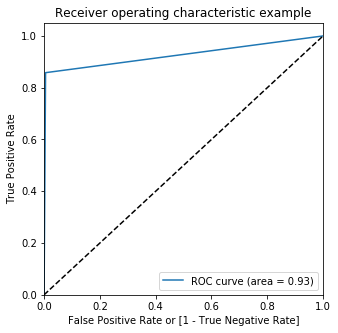

Accuracy on Test Dataset:  0.9944290345610524
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.22      0.86      0.35       148

    accuracy                           0.99     85443
   macro avg       0.61      0.93      0.67     85443
weighted avg       1.00      0.99      1.00     85443

Confusion Matrix on Test Dataset:
 [[84840   455]
 [   21   127]]


In [383]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(xgb_model_ros, threshold_train_val)

SMOTE

In [184]:
# fit model on training data with default hyperparameters
xgb_smote=XGBClassifier(random_state=0)
xgb_smote.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Train AUC: 99.89%
Train ROC Curve Threshold: 0.416


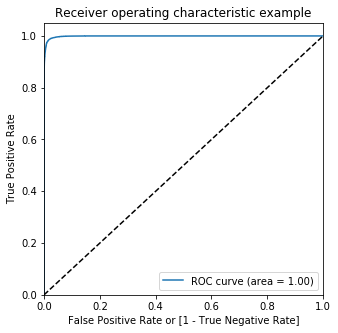

Computing Predictions based on threshold value of  0.41566917  and then computing below metrics

Train Accuracy:  0.9841171741533514
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    199020
           1       0.98      0.98      0.98    199020

    accuracy                           0.98    398040
   macro avg       0.98      0.98      0.98    398040
weighted avg       0.98      0.98      0.98    398040

Train Confusion Matrix:
 [[195704   3316]
 [  3006 196014]]


In [384]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(xgb_smote, X_train_smote, y_train_smote)

Test AUC: 92.43%


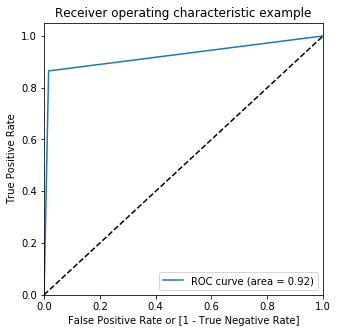

Accuracy on Test Dataset:  0.9834977704434535
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.86      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix on Test Dataset:
 [[83905  1390]
 [   20   128]]


In [385]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(xgb_model_smote, threshold_train_val)

In [188]:
def xgb_n_estimators(X_train, y_train, X_test, y_test):
    tree_range = range(2, 150, 15)
    score1=[]
    score2=[]
    for tree in tree_range:
        xgb=XGBClassifier(n_estimators=tree)
        xgb.fit(X_train,y_train)
        score1.append(xgb.score(X_train,y_train))
        score2.append(xgb.score(X_test,y_test))

    %matplotlib inline
    plt.figure(figsize=(8,4))
    plt.plot(tree_range,score1,label= 'Accuracy on training set')
    plt.plot(tree_range,score2,label= 'Accuracy on testing set')
    plt.xlabel('Value of number of trees in XGboost')
    plt.ylabel('Accuracy')
    plt.legend()

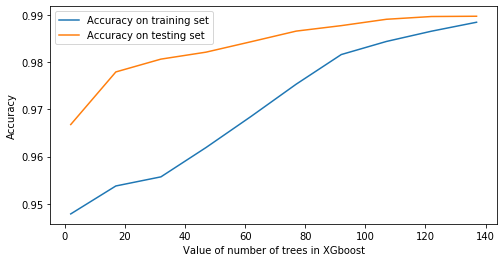

In [189]:
xgb_n_estimators(X_train_smote, y_train_smote, X_test, y_test)

In [190]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
# folds = 3
kfolds = StratifiedKFold(5)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=27)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train_smote, y_train_smote),
                        verbose = 1,
                        return_train_score=True)

In [191]:
# fit the model
model_cv.fit(X_train_smote, y_train_smote) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  8.5min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A34987DC8>,
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=27, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0

In [192]:
# printing the optimal  score and hyperparameters
print('We can get score of',model_cv.best_score_,'using',model_cv.best_params_)

We can get score of 0.9995142226706863 using {'learning_rate': 0.6, 'subsample': 0.9}


In [193]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [194]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')

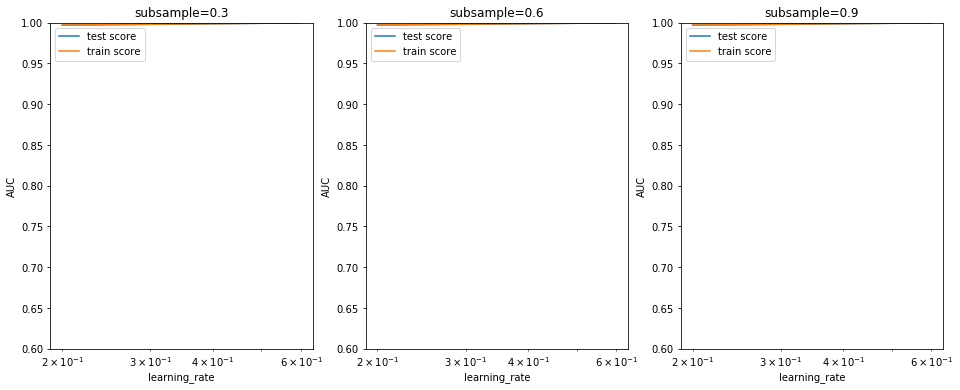

In [195]:
# # plotting
plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [196]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':27,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_smote = XGBClassifier(params = params)
xgb_model_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 27,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

Train AUC: 99.89%
Train ROC Curve Threshold: 0.416


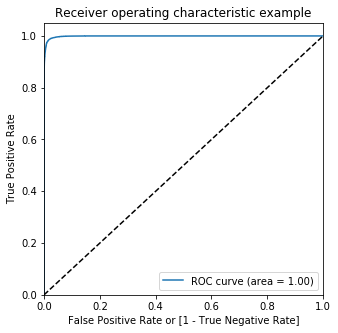

Computing Predictions based on threshold value of  0.41566917  and then computing below metrics

Train Accuracy:  0.9841171741533514
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    199020
           1       0.98      0.98      0.98    199020

    accuracy                           0.98    398040
   macro avg       0.98      0.98      0.98    398040
weighted avg       0.98      0.98      0.98    398040

Train Confusion Matrix:
 [[195704   3316]
 [  3006 196014]]


In [386]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(xgb_model_smote, X_train_smote, y_train_smote)

Test AUC: 92.43%


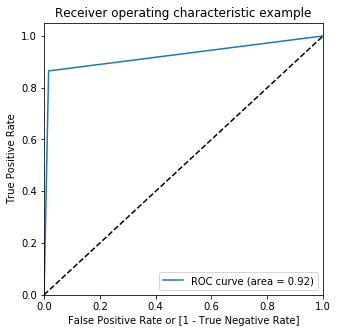

Accuracy on Test Dataset:  0.9834977704434535
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.86      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix on Test Dataset:
 [[83905  1390]
 [   20   128]]


In [387]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(xgb_model_smote, threshold_train_val)

ADASYN

In [198]:
# hyperparameter tuning with XGBoost
# creating a KFold object 
kfolds = StratifiedKFold(5)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=27)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = kfolds.split(X_train_adasyn, y_train_adasyn),
                        verbose = 1,
                        return_train_score=True)

In [199]:
# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  8.1min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000011A3B69E9C8>,
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=27, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0

In [200]:
# printing the optimal  score and hyperparameters
print('We can get score of',model_cv.best_score_,'using',model_cv.best_params_)

We can get score of 0.9900613108954542 using {'learning_rate': 0.6, 'subsample': 0.3}


In [201]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [202]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results['param_subsample'] = cv_results['param_subsample'].astype('float')

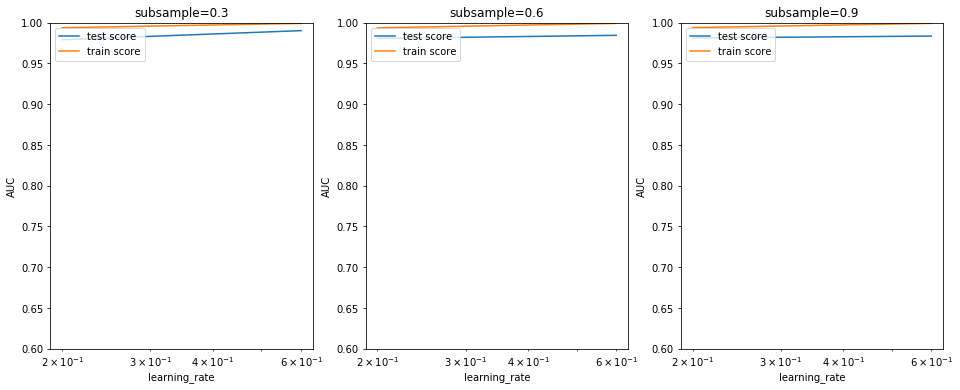

In [203]:
# # plotting
plt.figure(figsize=(16,6))

for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [204]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':27,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_adasyn = XGBClassifier(params = params)
xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 27,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

Train AUC: 99.74%
Train ROC Curve Threshold: 0.552


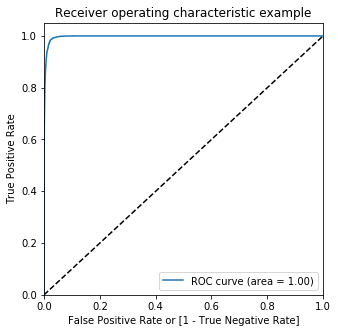

Computing Predictions based on threshold value of  0.55224705  and then computing below metrics

Train Accuracy:  0.980904618569756
Train Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    199020
           1       0.98      0.99      0.98    198982

    accuracy                           0.98    398002
   macro avg       0.98      0.98      0.98    398002
weighted avg       0.98      0.98      0.98    398002

Train Confusion Matrix:
 [[194094   4926]
 [  2674 196308]]


In [388]:
# Evaluation of model performance on Train subset
threshold_train_val = evaluation_metrics_train(xgb_model_adasyn, X_train_adasyn, y_train_adasyn)

Test AUC: 92.80%


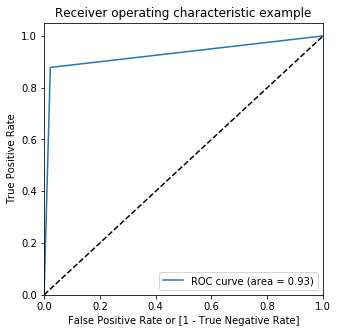

Accuracy on Test Dataset:  0.9773884343948598
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix on Test Dataset:
 [[83381  1914]
 [   18   130]]


In [389]:
# Evaluation of model performance on Test subset
evaluation_metrics_test(xgb_model_adasyn, threshold_train_val)

#### XGBoost Model Summary

| Model                | Train Dataset       | Hyperparameters              | Train AUC  | Threshold | Test AUC
| :-------------       | :-------------      | :----------:                 | -----------: | -----------: | -----------: |
|  XG Boost |  Imbalanced         | Default                      | 99.82%   | 0.003 |92.50%   |
|  XG Boost |  Imbalanced         | {'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.9}  | 99.82%   | 0.003 |92.50%   |
|  XG Boost |  Random Oversampler | {'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.9}  | 99.98%   | 0.544 |92.64%   |
|  XG Boost |  SMOTE              | {'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.9}   | 99.89%   | 0.416 |92.43%   |
|  XG Boost |  ADASYN             | {'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.3} | 99.74%   | 0.552 |92.80%   |

#### Models Summary

| Model                | Train Dataset       | Hyperparameters              | Train AUC   | Threshold | Test AUC |
| :-------------       | :-------------      | :----------:                 | -----------: | -----------: | -----------: |
|  Logistic Regression |  Imbalanced         | Default                      | 98.30%   | 0.003 | 91.44% |
|  Logistic Regression |  Imbalanced         | {'C': 0.1, 'penalty': 'l1'}  | 98.42%   | 0.003 | 91.91% |
|  Logistic Regression |  Random Oversampler | {'C': 100, 'penalty': 'l2'}  | 98.82%   | 0.632 | 86.75% |
|  Logistic Regression |  SMOTE              | {'C': 100, 'penalty': 'l2'}  | 98.87%   | 0.528 | 88.77% |
|  Logistic Regression |  ADASYN             | {'C': 0.01, 'penalty': 'l2'} | 96.48%   | 0.407 | 89.44% |
| K-Nearest Neighbours |  Imbalanced         | Default  | 100.00%   | 0.5 | 89.11% |
| K-Nearest Neighbours |  Random Oversampler | {'n_neighbors'=3}   | 100.00%   | 1 | 50% |
| K-Nearest Neighbours |  SMOTE              | {'n_neighbors'=3}   | 100.00%   | 1 | 50%|
| K-Nearest Neighbours |  ADASYN             | {'n_neighbors'=3}  | 100.00%   | 1 | 50%|
|  Decision Tree |  Imbalanced         | Default                      | 92.29%   | 0.015 | 79.34%   |
|  Decision Tree |  Imbalanced         | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 80, 'min_samples_split': 50} | 99.19%  | 0.011 | 91.70%   |
|  Decision Tree |  Random Oversampler | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50}  | 99.71%   | 0.830 | 90.46%   |
|  Decision Tree |  SMOTE              | {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 50}  | 99.65%   | 0.550 | 91.02%   |
|  Decision Tree |  ADASYN             | {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 80, 'min_samples_split': 50}| 98.05%   | 0.576 | 89.64%   |
|  Random Forest |  Imbalanced         | Default                      | 100%   | 0.200 | 91.71%   | 
|  Random Forest |  Imbalanced         | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 250, 'n_estimators': 200}  | 99.22%   | 0.001 | 89.29% |
|  Random Forest |  Random Oversampler | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 100}  | 99.94%   | 0.297 | 92.67% |
|  Random Forest |  SMOTE              | {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 100}  | 99.72%   | 0.426 | 92.71% |
|  Random Forest |  ADASYN             | {'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 100} | 99.58%   | 0.555 | 92.67% |
|  XG Boost |  Imbalanced         | Default                      | 99.82%   | 0.003 |92.50%   |
|  XG Boost |  Imbalanced         | {'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.9}  | 99.82%   | 0.003 |92.50%   |
|  XG Boost |  Random Oversampler | {'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.9}  | 99.98%   | 0.544 |92.64%   |
|  XG Boost |  SMOTE              | {'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.9}   | 99.89%   | 0.416 |92.43%   |
|  XG Boost |  ADASYN             | {'n_estimators':27, 'learning_rate': 0.6, 'subsample': 0.3} | 99.74%   | 0.552 |92.80%   |

ROC AUC curve works best on balanced datasets whereas the precision recall curve explains the imbalanced datasets.

Baseline model is `Random Forest` as it has yielded the best AUC. This dataset was built on `SMOTE` dataset.

Test AUC: 92.71%


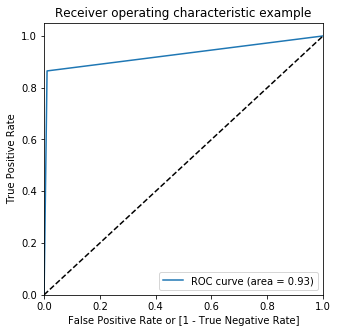

Accuracy on Test Dataset:  0.9890921433002119
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.86      0.22       148

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443

Confusion Matrix on Test Dataset:
 [[84383   912]
 [   20   128]]


In [409]:
evaluation_metrics_test(rfc_smote, 0.426)

#### Important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 12


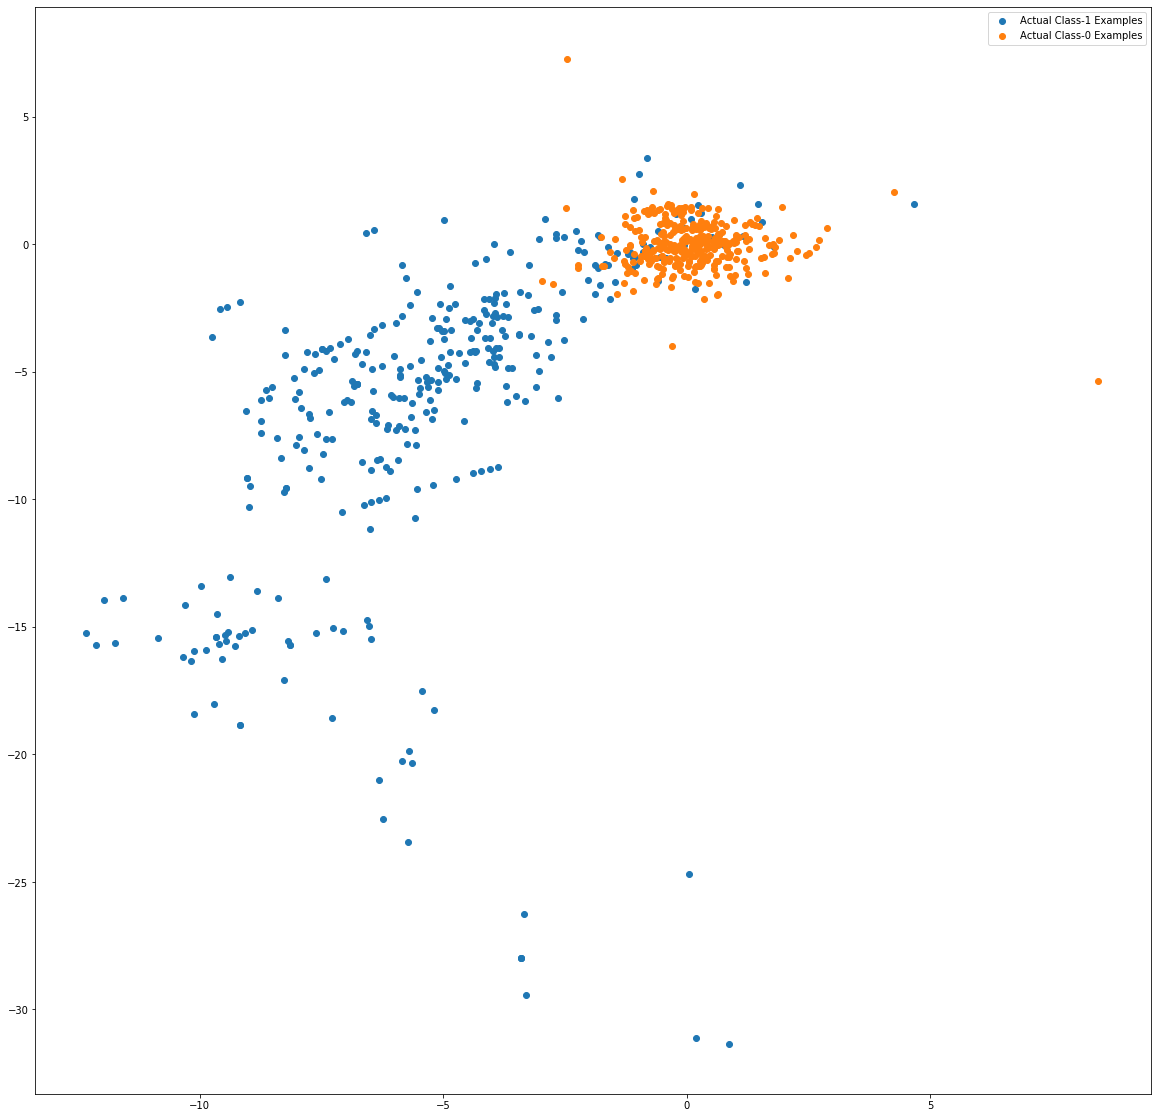

In [410]:
var_imp = []
for i in rfc_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rfc_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rfc_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rfc_smote.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(rfc_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rfc_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Cost Benefit Analysis

In [436]:
# predictions on test subset
y_pred = rfc_smote.predict(X_test)

In [437]:
# computing confusion matrix
cm=confusion_matrix(y_test, y_pred)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
print(cm)

[[84696   599]
 [   20   128]]


In [438]:
# create predictions dataframe. Column 1 is Class --> Actual
test_predictions = pd.DataFrame(y_test)
test_predictions.rename(columns={'Class':'Actual'}, inplace=True)
test_predictions.head()

,Actual
262922,0
123418,0
206135,0
273483,0
245758,0


In [439]:
# add predicted columns with prediction values
test_predictions['Predicted'] = y_pred
test_predictions.head()

,Actual,Predicted
262922,0,0
123418,0,1
206135,0,0
273483,0,0
245758,0,0


In [445]:
# merge with transaction amount from the original dataframe by merging based on index values
test_predictions = test_predictions.merge(pd.DataFrame(df_orig['Amount']), left_index=True, right_index=True)
test_predictions.head()

,Actual,Predicted,Amount
262922,0,0,101.42
123418,0,1,9.99
206135,0,0,10.49
273483,0,0,1.00
245758,0,0,227.75


In [446]:
# Computing transaction cost for all True Positive cases
trnx_cost_TP = test_predictions.query('Actual==1 & Predicted==1')['Amount'].sum()
trnx_cost_TP

13832.480000000001

In [447]:
# Computing transaction cost for all False Negative cases
trnx_cost_FN = test_predictions.query('Actual==1 & Predicted==0')['Amount'].sum()
trnx_cost_FN

3620.8300000000004

In [448]:
# Assuming 10 units as the cost of each verification call
call_verification_cost = (TP + FP) * 10
call_verification_cost

7270

#### Total Savings (Cost Benefit Analysis)

In [459]:
total_savings = trnx_cost_TP - (trnx_cost_FN + call_verification_cost)
print("Total Savings (Cost Benefit Analysis) is ", round(total_savings,2), "amount units on Test Subset")

Total Savings (Cost Benefit Analysis) is  2941.65 amount units on Test Subset
